# Load and read dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
pd.set_option('display.max_columns',None)
pd.set_option('display.float_format', '{:.2f}'.format)
df_listings=pd.read_csv('listings_detailed.csv')
df_listings.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,estimated_revenue_l365d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,1034638294163485758,https://www.airbnb.com/rooms/1034638294163485758,20250627030533,2025-06-28,city scrape,1K/6 min.walk from Korakuen Station/202,"4 lines available, new construction, close to ...","""Korakuen is home to the Tokyo Dome, a landmar...",https://a0.muscache.com/pictures/miso/Hosting-...,507235651,https://www.airbnb.com/users/show/507235651,Sumyca,2023-03-26,"Tokyo, Japan",わたしたち「Sumyca」は、スマホ1つで住宅、宿泊共に予約が完結する短期賃貸プラットフォー...,within an hour,100%,97%,f,https://a0.muscache.com/im/pictures/user/User-...,https://a0.muscache.com/im/pictures/user/User-...,NaN,74.00,76.00,['phone'],t,t,"Bunkyo City, Tokyo Prefecture, Japan",Bunkyo Ku,NaN,35.71,139.75,Entire rental unit,Entire home/apt,3,1.00,1 bath,0.00,2.00,"[""Bidet"", ""Body soap"", ""Bed linens"", ""Hot wate...","$100,000.00",30,365,30.00,30.00,365.00,365.00,30.00,365.00,NaN,t,16,46,76,251,2025-06-28,0,0,0,173,0,0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M130033302,t,74,74,0,0,NaN
1,1034640917459370080,https://www.airbnb.com/rooms/1034640917459370080,20250627030533,2025-06-28,city scrape,Near Tokyo Dome/6 min. walk from Korakuen/d01,"4 lines available, new construction, close to ...","Korakuen is home to the Tokyo Dome, a landmark...",https://a0.muscache.com/pictures/miso/Hosting-...,507235651,https://www.airbnb.com/users/show/507235651,Sumyca,2023-03-26,"Tokyo, Japan",わたしたち「Sumyca」は、スマホ1つで住宅、宿泊共に予約が完結する短期賃貸プラットフォー...,within an hour,100%,97%,f,https://a0.muscache.com/im/pictures/user/User-...,https://a0.muscache.com/im/pictures/user/User-...,NaN,74.00,76.00,['phone'],t,t,"Bunkyo City, Tokyo Prefecture, Japan",Bunkyo Ku,NaN,35.71,139.75,Entire rental unit,Entire home/apt,8,1.00,1 bath,2.00,5.00,"[""Bidet"", ""Body soap"", ""Bed linens"", ""Hot wate...","$100,000.00",30,365,30.00,30.00,365.00,365.00,30.00,365.00,NaN,t,2,27,57,237,2025-06-28,0,0,0,154,0,0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M130033307,t,74,74,0,0,NaN
2,1034643225542448999,https://www.airbnb.com/rooms/1034643225542448999,20250627030533,2025-06-27,city scrape,"QY31 JR Train station 5-min walk, airport dire...","Dear friends, I really appreciate that you rea...",NaN,https://a0.muscache.com/pictures/hosting/Hosti...,279064316,https://www.airbnb.com/users/show/279064316,Na,2019-07-25,NaN,NaN,within an hour,100%,100%,f,https://a0.muscache.com/im/pictures/user/e5cb6...,https://a0.muscache.com/im/pictures/user/e5cb6...,Asakusa/Ueno,41.00,41.00,"['email', 'phone']",t,t,NaN,Taito Ku,NaN,35.70,139.78,Entire serviced apartment,Entire home/apt,4,2.00,2 baths,2.00,2.00,"[""Room-darkening shades"", ""Body soap"", ""Carbon...","$1

In [3]:
df_listings['neighbourhood_cleansed'].nunique()

49

In [61]:
df_reviews=pd.read_csv('reviews_detailed.csv')
df_reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1034643225542448999,1038843202296163919,2023-12-04,537054138,Gio,"Walking distance to Akihabara, many restaurant..."
1,1034643225542448999,1043840074965670496,2023-12-11,38643938,Takuji,コンパクトでちょうど良いサイズ感でした。<br/>綺麗にリノベーションされており、過ごしやす...
2,1034643225542448999,1088074836356243885,2024-02-10,103064428,Dante,Good location just 6 min walk from Asakusabash...
3,1034643225542448999,1092394798128251121,2024-02-16,521516097,Jessica,Amazing Airbnb such a nice location and really...
4,1034643225542448999,1095367927933801250,2024-02-20,31225744,Yuichiro,"Great location, good price. No complain!"


In [62]:
df_calendar=pd.read_csv('calendar.csv')
df_calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,1034638294163485758,2025-06-28,f,NaN,NaN,30,365
1,1034638294163485758,2025-06-29,f,NaN,NaN,30,365
2,1034638294163485758,2025-06-30,f,NaN,NaN,30,365
3,1034638294163485758,2025-07-01,t,NaN,NaN,30,365
4,1034638294163485758,2025-07-02,t,NaN,NaN,30,365


In [63]:
df_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25297 entries, 0 to 25296
Data columns (total 79 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            25297 non-null  int64  
 1   listing_url                                   25297 non-null  object 
 2   scrape_id                                     25297 non-null  int64  
 3   last_scraped                                  25297 non-null  object 
 4   source                                        25297 non-null  object 
 5   name                                          25297 non-null  object 
 6   description                                   24879 non-null  object 
 7   neighborhood_overview                         14048 non-null  object 
 8   picture_url                                   25297 non-null  object 
 9   host_id                                       25297 non-null 

In [64]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 930799 entries, 0 to 930798
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   listing_id     930799 non-null  int64 
 1   id             930799 non-null  int64 
 2   date           930799 non-null  object
 3   reviewer_id    930799 non-null  int64 
 4   reviewer_name  930797 non-null  object
 5   comments       930679 non-null  object
dtypes: int64(3), object(3)
memory usage: 42.6+ MB


In [65]:
df_calendar.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9233406 entries, 0 to 9233405
Data columns (total 7 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   listing_id      9233406 non-null  int64  
 1   date            9233406 non-null  object 
 2   available       9233406 non-null  object 
 3   price           0 non-null        float64
 4   adjusted_price  0 non-null        float64
 5   minimum_nights  9233406 non-null  int64  
 6   maximum_nights  9233406 non-null  int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 493.1+ MB


In [66]:
df_listings['minimum_nights'].value_counts()

minimum_nights
1      11661
2       7429
30      2756
3       2215
4        442
5        196
28       144
31        93
7         66
6         64
32        50
20        49
14        23
29        23
25        13
10        12
15         8
60         6
100        6
180        5
18         5
8          4
365        4
200        3
21         3
90         2
16         2
27         2
26         2
33         1
50         1
24         1
35         1
55         1
62         1
92         1
360        1
40         1
Name: count, dtype: int64

In [67]:
df_combined=pd.merge(df_listings,df_calendar,left_on='id',right_on='listing_id',how='left')
df_combined.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price_x,minimum_nights_x,maximum_nights_x,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,estimated_revenue_l365d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,listing_id,date,available,price_y,adjusted_price,minimum_nights_y,maximum_nights_y
0,1034638294163485758,https://www.airbnb.com/rooms/1034638294163485758,20250627030533,2025-06-28,city scrape,1K/6 min.walk from Korakuen Station/202,"4 lines available, new construction, close to ...","""Korakuen is home to the Tokyo Dome, a landmar...",https://a0.muscache.com/pictures/miso/Hosting-...,507235651,https://www.airbnb.com/users/show/507235651,Sumyca,2023-03-26,"Tokyo, Japan",わたしたち「Sumyca」は、スマホ1つで住宅、宿泊共に予約が完結する短期賃貸プラットフォー...,within an hour,100%,97%,f,https://a0.muscache.com/im/pictures/user/User-...,https://a0.muscache.com/im/pictures/user/User-...,NaN,74.00,76.00,['phone'],t,t,"Bunkyo City, Tokyo Prefecture, Japan",Bunkyo Ku,NaN,35.71,139.75,Entire rental unit,Entire home/apt,3,1.00,1 bath,0.00,2.00,"[""Bidet"", ""Body soap"", ""Bed linens"", ""Hot wate...","$100,000.00",30,365,30.00,30.00,365.00,365.00,30.00,365.00,NaN,t,16,46,76,251,2025-06-28,0,0,0,173,0,0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M130033302,t,74,74,0,0,NaN,1034638294163485758,2025-06-28,f,NaN,NaN,30,365
1,1034638294163485758,https://www.airbnb.com/rooms/1034638294163485758,20250627030533,2025-06-28,city scrape,1K/6 min.walk from Korakuen Station/202,"4 lines available, new construction, close to ...","""Korakuen is home to the Tokyo Dome, a landmar...",https://a0.muscache.com/pictures/miso/Hosting-...,507235651,https://www.airbnb.com/users/show/507235651,Sumyca,2023-03-26,"Tokyo, Japan",わたしたち「Sumyca」は、スマホ1つで住宅、宿泊共に予約が完結する短期賃貸プラットフォー...,within an hour,100%,97%,f,https://a0.muscache.com/im/pictures/user/User-...,https://a0.muscache.com/im/pictures/user/User-...,NaN,74.00,76.00,['phone'],t,t,"Bunkyo City, Tokyo Prefecture, Japan",Bunkyo Ku,NaN,35.71,139.75,Entire rental unit,Entire home/apt,3,1.00,1 bath,0.00,2.00,"[""Bidet"", ""Body soap"", ""Bed linens"", ""Hot wate...","$100,000.00",30,365,30.00,30.00,365.00,365.00,30.00,365.00,NaN,t,16,46,76,251,2025-06-28,0,0,0,173,0,0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M130033302,t,74,74,0,0,NaN,1034638294163485758,2025-06-29,f,NaN,NaN,30,365
2,1034638294163485758,https://www.airbnb.com/rooms/1034638294163485758,20250627030533,2025-06-28,city scrape,1K/6 min.walk from Korakuen Station/202,"4 lines available, new construction, close to ...","""Korakuen is home to the Tokyo Dome, a landmar...",https://a0.muscache.com/pictures/miso/Hosting-...,507235651,https://www.airbnb.com/users/show/507235651,Sumyca,2023-03-26,"Tokyo, Japan",わたしたち「Sumyca」は、スマホ1つで住宅、宿泊共に予約が完結する短期賃貸プラットフォー...,within an hour,100%,97%,f,https://a0.muscache.com/im/pi

In [68]:
df_reviews['date'].value_counts()

date
2025-05-05    1636
2025-05-25    1613
2025-04-06    1609
2025-04-20    1591
2025-06-01    1586
              ... 
2012-10-14       1
2013-10-19       1
2014-08-25       1
2016-03-21       1
2014-05-17       1
Name: count, Length: 4342, dtype: int64

# Data Cleaning

## Drop column more than 80% null values

In [69]:
drop_cols=df_listings.columns[df_listings.isnull().sum()/df_listings.shape[0]>0.8]
print(drop_cols)
df_listings.drop(drop_cols,axis=1,inplace=True)
print(df_listings.shape)

Index(['neighbourhood_group_cleansed', 'calendar_updated'], dtype='object')
(25297, 77)


## Price Cleaning

In [70]:
df_listings['price']=df_listings['price'].replace('[$,]','',regex=True)
df_listings['price']=df_listings['price'].astype(float)
# df_listings['price'].fillna(df_listings['price'].median(),inplace=True)

## Response and acceptance rate cleaning

In [71]:
df_listings['host_response_rate']=df_listings['host_response_rate'].str.replace('%','')
df_listings['host_acceptance_rate']=df_listings['host_acceptance_rate'].str.replace('%','')
df_listings['host_response_rate']=df_listings['host_response_rate'].astype(float)
df_listings['host_acceptance_rate']=df_listings['host_acceptance_rate'].astype(float)

## Response Time Cleaning

In [72]:
df_listings['host_response_time']=df_listings['host_response_time'].dropna()

## Change to datetime

In [73]:
df_listings['host_since']=pd.to_datetime(df_listings['host_since'])
df_listings['calendar_last_scraped']=pd.to_datetime(df_listings['calendar_last_scraped'])
df_listings['first_review']=pd.to_datetime(df_listings['first_review'])
df_listings['last_review']=pd.to_datetime(df_listings['last_review'])

## Change index to number for prediction

In [74]:
df_listings['host_is_superhost'].fillna('n',inplace=True)
df_listings['host_is_superhost']=df_listings['host_is_superhost'].map({'t':1,'f':0,'n':2})

C:\Users\hangk\AppData\Local\Temp\ipykernel_42840\1775679589.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_listings['host_is_superhost'].fillna('n',inplace=True)


In [75]:
df_listings['host_has_profile_pic'].fillna('n',inplace=True)
df_listings['host_has_profile_pic']=df_listings['host_has_profile_pic'].map({'t':1,'f':0,'n':2})

C:\Users\hangk\AppData\Local\Temp\ipykernel_42840\32640303.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_listings['host_has_profile_pic'].fillna('n',inplace=True)


In [76]:
df_listings['host_identity_verified'].fillna('n',inplace=True)
df_listings['host_identity_verified']=df_listings['host_identity_verified'].map({'t':1,'f':0,'n':2})

C:\Users\hangk\AppData\Local\Temp\ipykernel_42840\2823354275.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_listings['host_identity_verified'].fillna('n',inplace=True)


In [77]:
df_listings['instant_bookable']=df_listings['instant_bookable'].map({'t':1,'f':0})

In [78]:
df_calendar['available']=df_calendar['available'].map({'t':1,'f':0})

In [79]:
df_listings['reviews_per_month'].fillna(0,inplace=True)

C:\Users\hangk\AppData\Local\Temp\ipykernel_42840\1460256116.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_listings['reviews_per_month'].fillna(0,inplace=True)


In [80]:
df_listings['host_verifications'].unique()

array(["['phone']", "['email', 'phone']", nan,
       "['email', 'phone', 'work_email']", "['phone', 'work_email']",
       "['email']", '[]'], dtype=object)

## Deal with null values in necessary columns

In [81]:
review_score_columns=['review_scores_rating','review_scores_accuracy','review_scores_cleanliness',
           'review_scores_checkin','review_scores_communication','review_scores_location',
           'review_scores_value']
for col in review_score_columns:
  df_listings[col].fillna(df_listings[col].mean(),inplace=True)
df_listings['average_score_review']=df_listings[review_score_columns].mean(axis=1)
df_listings['average_score_review']=df_listings['average_score_review'].round(2)

df_listings['bathrooms'].fillna(0,inplace=True)
df_listings['bedrooms'].fillna(0,inplace=True)
df_listings['beds'].fillna(0,inplace=True)
df_listings['license'].fillna('Unknown',inplace=True)
df_listings['neighbourhood'].fillna('Unknown',inplace=True)

C:\Users\hangk\AppData\Local\Temp\ipykernel_42840\3809276442.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_listings[col].fillna(df_listings[col].mean(),inplace=True)
C:\Users\hangk\AppData\Local\Temp\ipykernel_42840\3809276442.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a c

In [82]:
df_listings.sample(5)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,estimated_revenue_l365d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,average_score_review
164,1041005776333726985,https://www.airbnb.com/rooms/1041005776333726985,20250627030533,2025-07-01,city scrape,"Max.7ppl/ house/ 11 mins from station, Ikebukuro","Blue moment ｜Gunjoh<br /><br />Ikebukuro, the ...","Ikebukuro is located in Toshima Ward, Tokyo, a...",https://a0.muscache.com/pictures/hosting/Hosti...,318235422,https://www.airbnb.com/users/show/318235422,Yanagihara,2019-12-16,NaN,NaN,within an hour,100.00,97.00,0,https://a0.muscache.com/im/pictures/user/d374d...,https://a0.muscache.com/im/pictures/user/d374d...,NaN,64.00,86.00,"['email', 'phone', 'work_email']",1,1,"Toshima City, Tokyo Prefecture, Japan",Toshima Ku,35.74,139.71,Entire home,Entire home/apt,7,1.00,1 bath,3.00,4.00,"[""Clothing storage: closet"", ""Hair dryer"", ""Lo...",22465.00,1,365,1.00,1.00,365.00,365.00,1.00,365.00,t,0,24,54,253,2025-07-01,31,13,0,133,22,78,1752270.00,2024-01-19,2025-04-23,4.74,4.71,4.90,4.84,4.87,4.48,4.67,M130036826,1,51,51,0,0,1.75,4.74
14882,1187355584487248612,https://www.airbnb.com/rooms/1187355584487248612,20250627030533,2025-07-02,city scrape,機場直達 Skytree車站徒步5分 2间套房 2套卫浴 廚房 洗衣機 電梯 Amin H...,"★This inn is located near Skytree, Skytree★<br...",NaN,https://a0.muscache.com/pictures/hosting/Hosti...,582261175,https://www.airbnb.com/users/show/582261175,Hui Hsin,2024-06-08,NaN,熱愛旅行,within an hour,90.00,84.00,0,https://a0.muscache.com/im/pictures/user/User-...,https://a0.muscache.com/im/pictures/user/User-...,NaN,53.00,57.00,['phone'],1,1,Unknown,Sumida Ku,35.71,139.81,Room in boutique hotel,Private room,10,2.00,2 baths,2.00,5.00,"[""Fire extinguisher"", ""Carbon monoxide alarm"",...",22237.00,2,365,2.00,2.00,365.00,365.00,2.00,365.00,t,29,59,89,121,2025-07-02,0,0,0,121,0,0,0.00,NaT,NaT,4.72,4.76,4.71,4.79,4.83,4.71,4.67,Hotels and Inns Business Act | 墨田区保健所 | 5墨福衛生環...,0,12,2,10,0,0.00,4.74
23125,1399196338407222482,https://www.airbnb.com/rooms/1399196338407222482,20250627030533,2025-07-01,previous scrape,狭山茶の宿 星の見える離れ,This spacious new opening!Sun Damari House <b...,NaN,https://a0.muscache.com/pictures/hosting/Hosti...,504568615,https://www.airbnb.com/users/show/504568615,Jiaming,2023-03-09,"Higashiyamato, Japan",NaN,within an hour,100.00,99.00,0,https://a0.muscache.com/im/pictures/user/User/...,https://a0.muscache.com/im/pictures/user/User/...,NaN,3.00,4.00,"['email', 'phone']",1,1,Unknown,Higashiyamato Shi,35.74,139.43,Shared room in home,Shared room,5,0.00,1 shared bath,0.00,0.00,"[""Heating - split type ductless system"", ""Air ...",NaN,1,365,1.00,1.00,365.00,365.00,1.00,365.00,t,0,0,0,0,2025-07-01,3,3,0,0,0,18,NaN,2025-04-19,2025-05-06,4.67,3.67,4.33,5.00,5.0

In [83]:
df_listings[df_listings['price']>200000].head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,estimated_revenue_l365d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,average_score_review
441,1049665661435824804,https://www.airbnb.com/rooms/1049665661435824804,20250627030533,2025-07-01,city scrape,横二 307 大床/WIFI/近晴空塔,Enjoy a memorable trip at this unique place.,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,551628763,https://www.airbnb.com/users/show/551628763,Chenhao,2023-12-19,NaN,NaN,within a day,50.00,100.00,0,https://a0.muscache.com/im/pictures/user/9bbc5...,https://a0.muscache.com/im/pictures/user/9bbc5...,NaN,1.00,2.00,"['email', 'phone']",1,1,Unknown,Sumida Ku,35.71,139.81,Entire rental unit,Entire home/apt,2,1.00,1 bath,1.00,1.00,"[""Air conditioning"", ""Wifi""]",799999.00,1,365,1.00,1.00,365.00,365.00,1.00,365.00,t,30,60,90,365,2025-07-01,0,0,0,184,0,0,0.00,NaT,NaT,4.72,4.76,4.71,4.79,4.83,4.71,4.67,Hotels and Inns Business Act | 墨田区保健所 | 3墨福衛生環...,1,1,1,0,0,0.00,4.74
566,1055395750947851389,https://www.airbnb.com/rooms/1055395750947851389,20250627030533,2025-06-30,city scrape,Yoosuu Premium UENO,This is a luxurious large flat house in Hermès...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,232836811,https://www.airbnb.com/users/show/232836811,Chonglin,2018-12-27,"Tokyo, Japan",大家好，我是Luwei，曾经是互联网IT男， 现在是一名船长，住在东京，爱生活，爱航海，爱旅...,within an hour,100.00,100.00,0,https://a0.muscache.com/im/pictures/user/be385...,https://a0.muscache.com/im/pictures/user/be385...,Edogawa District,43.00,56.00,"['email', 'phone']",1,1,Unknown,Taito Ku,35.70,139.78,Entire rental unit,Entire home/apt,4,1.50,1.5 baths,2.00,3.00,"[""Room-darkening shades"", ""Cooking basics"", ""L...",530286.00,1,365,1.00,1.00,365.00,365.00,1.00,365.00,t,4,27,57,83,2025-06-30,1,0,0,83,1,0,0.00,2024-02-13,2024-02-13,5.00,5.00,5.00,5.00,5.00,5.00,4.00,M130026543,1,42,37,5,0,0.06,4.86
1227,16279531,https://www.airbnb.com/rooms/16279531,20250627030533,2025-06-28,city scrape,Modern 3-Bedroom 80m2 Apartment near Shibuya!,Welcome to our Home! This beautiful apartment ...,Sangenjaya is a really cool neighbourhood...wh...,https://a0.muscache.com/pictures/92ffb898-a45c...,35135366,https://www.airbnb.com/users/show/35135366,Suyeon,2015-06-06,"Tokyo, Japan",Hi!! We are a multi-cultural family living her...,within an hour,100.00,100.00,0,https://a0.muscache.com/im/pictures/user/6ebf1...,https://a0.muscache.com/im/pictures/user/6ebf1...,NaN,1.00,3.00,"['email', 'phone']",1,1,"Setagaya City, Tokyo-to, Japan",Setagaya Ku,35.65,139.67,Entire rental unit,Entire home/apt,6,2.00,2 baths,3.00,5.00,"[""Cooking basics"", ""Random conditioner"", ""Dini...",206064.00,3,30,2.00,3.00,30.00,30.00,3.00,30.00,t,1,13,34,34,2025-06-28,185,28,3,34,22,168,34618752.00,2016-12-24,2025-06-14,4.96,4.94,4.90,4

In [84]:
df_listings['price'].isnull().sum()

np.int64(2037)

In [85]:
df_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25297 entries, 0 to 25296
Data columns (total 78 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   id                                            25297 non-null  int64         
 1   listing_url                                   25297 non-null  object        
 2   scrape_id                                     25297 non-null  int64         
 3   last_scraped                                  25297 non-null  object        
 4   source                                        25297 non-null  object        
 5   name                                          25297 non-null  object        
 6   description                                   24879 non-null  object        
 7   neighborhood_overview                         14048 non-null  object        
 8   picture_url                                   25297 non-null  obje

In [86]:
filter_listing=df_listings[(df_listings['neighbourhood_cleansed']=='Ota Ku')|(df_listings['neighbourhood_cleansed']=='Shibuya Ku')|
(df_listings['neighbourhood_cleansed']=='Toshima Ku')|(df_listings['neighbourhood_cleansed']=='Taito Ku')|
(df_listings['neighbourhood_cleansed']=='Sumida Ku')|(df_listings['neighbourhood_cleansed']=='Shinjuku Ku')]

In [87]:
df_filter_combined=pd.merge(filter_listing,df_calendar,left_on='id',right_on='listing_id',how='left')
df_combined.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price_x,minimum_nights_x,maximum_nights_x,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,estimated_revenue_l365d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,listing_id,date,available,price_y,adjusted_price,minimum_nights_y,maximum_nights_y
0,1034638294163485758,https://www.airbnb.com/rooms/1034638294163485758,20250627030533,2025-06-28,city scrape,1K/6 min.walk from Korakuen Station/202,"4 lines available, new construction, close to ...","""Korakuen is home to the Tokyo Dome, a landmar...",https://a0.muscache.com/pictures/miso/Hosting-...,507235651,https://www.airbnb.com/users/show/507235651,Sumyca,2023-03-26,"Tokyo, Japan",わたしたち「Sumyca」は、スマホ1つで住宅、宿泊共に予約が完結する短期賃貸プラットフォー...,within an hour,100%,97%,f,https://a0.muscache.com/im/pictures/user/User-...,https://a0.muscache.com/im/pictures/user/User-...,NaN,74.00,76.00,['phone'],t,t,"Bunkyo City, Tokyo Prefecture, Japan",Bunkyo Ku,NaN,35.71,139.75,Entire rental unit,Entire home/apt,3,1.00,1 bath,0.00,2.00,"[""Bidet"", ""Body soap"", ""Bed linens"", ""Hot wate...","$100,000.00",30,365,30.00,30.00,365.00,365.00,30.00,365.00,NaN,t,16,46,76,251,2025-06-28,0,0,0,173,0,0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M130033302,t,74,74,0,0,NaN,1034638294163485758,2025-06-28,f,NaN,NaN,30,365
1,1034638294163485758,https://www.airbnb.com/rooms/1034638294163485758,20250627030533,2025-06-28,city scrape,1K/6 min.walk from Korakuen Station/202,"4 lines available, new construction, close to ...","""Korakuen is home to the Tokyo Dome, a landmar...",https://a0.muscache.com/pictures/miso/Hosting-...,507235651,https://www.airbnb.com/users/show/507235651,Sumyca,2023-03-26,"Tokyo, Japan",わたしたち「Sumyca」は、スマホ1つで住宅、宿泊共に予約が完結する短期賃貸プラットフォー...,within an hour,100%,97%,f,https://a0.muscache.com/im/pictures/user/User-...,https://a0.muscache.com/im/pictures/user/User-...,NaN,74.00,76.00,['phone'],t,t,"Bunkyo City, Tokyo Prefecture, Japan",Bunkyo Ku,NaN,35.71,139.75,Entire rental unit,Entire home/apt,3,1.00,1 bath,0.00,2.00,"[""Bidet"", ""Body soap"", ""Bed linens"", ""Hot wate...","$100,000.00",30,365,30.00,30.00,365.00,365.00,30.00,365.00,NaN,t,16,46,76,251,2025-06-28,0,0,0,173,0,0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M130033302,t,74,74,0,0,NaN,1034638294163485758,2025-06-29,f,NaN,NaN,30,365
2,1034638294163485758,https://www.airbnb.com/rooms/1034638294163485758,20250627030533,2025-06-28,city scrape,1K/6 min.walk from Korakuen Station/202,"4 lines available, new construction, close to ...","""Korakuen is home to the Tokyo Dome, a landmar...",https://a0.muscache.com/pictures/miso/Hosting-...,507235651,https://www.airbnb.com/users/show/507235651,Sumyca,2023-03-26,"Tokyo, Japan",わたしたち「Sumyca」は、スマホ1つで住宅、宿泊共に予約が完結する短期賃貸プラットフォー...,within an hour,100%,97%,f,https://a0.muscache.com/im/pi

# EDA



## Correlation Matrix for availability column

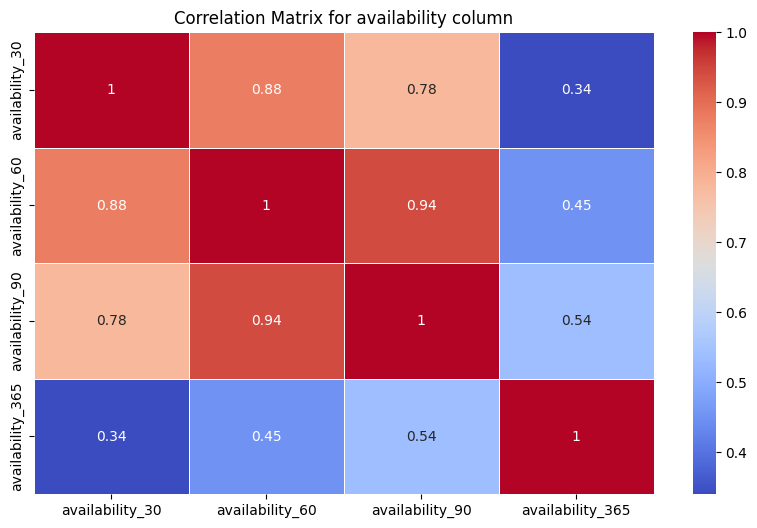

In [88]:
availability=['availability_30','availability_60','availability_90','availability_365']

corr_available=df_listings[availability].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_available,annot=True,cmap='coolwarm',linewidths=0.5)
plt.title('Correlation Matrix for availability column')
plt.show()

# Demand & Supply Insights

## Listing distribution

In [89]:
!pip install folium pandas


[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [90]:
import folium
from folium.plugins import HeatMap
import pandas as pd

tokyo_map=folium.Map(location=[35.6895,139.6917],zoom_start=20)

heat_data=df_listings[['latitude','longitude']].values

HeatMap(heat_data).add_to(tokyo_map)

tokyo_map.save('tokyo_heatmap.html')

<Axes: xlabel='neighbourhood_cleansed'>

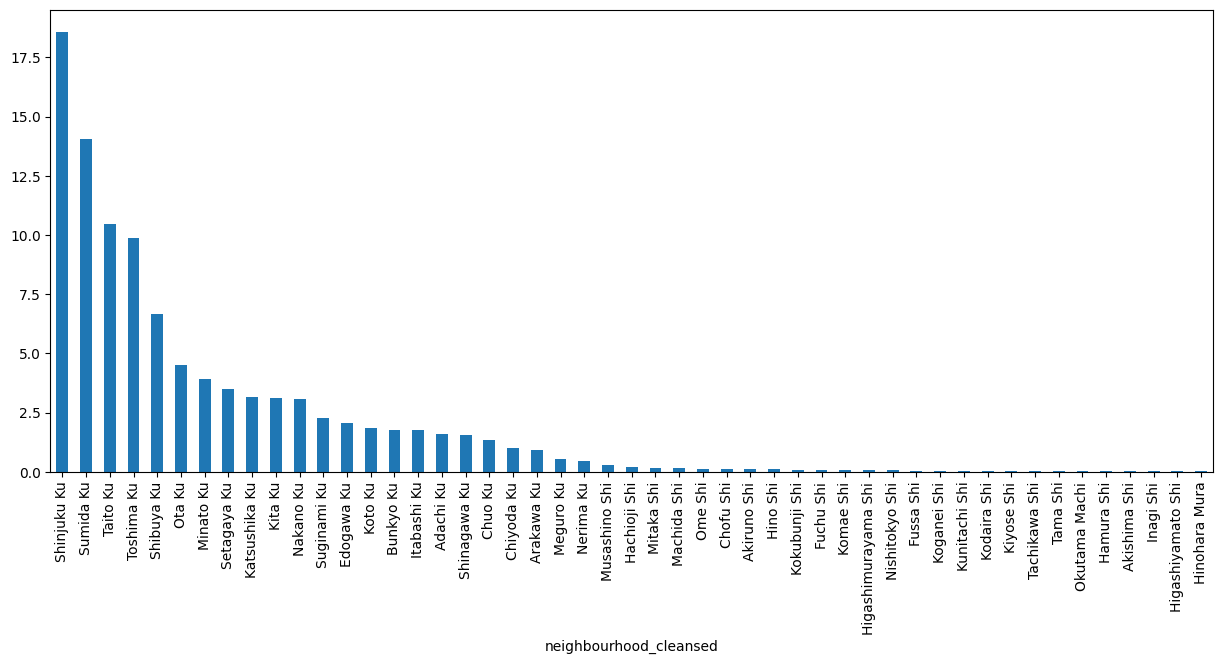

In [91]:
((df_listings['neighbourhood_cleansed'].value_counts())/(df_listings['neighbourhood_cleansed'].count())*100).plot(kind='bar',figsize=(15,6))

## Room Types distribution

<Axes: xlabel='room_type'>

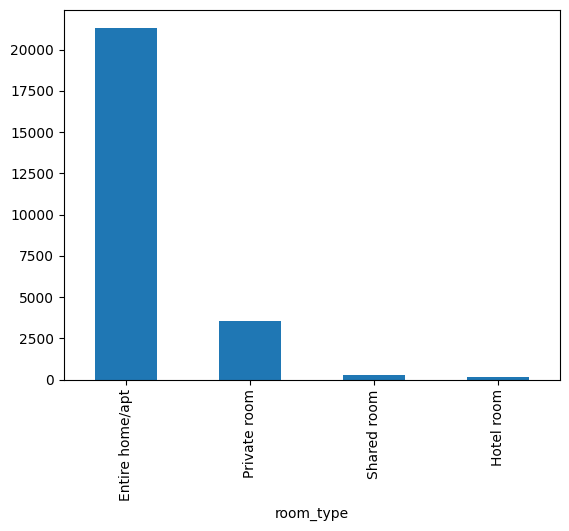

In [92]:
df_listings['room_type'].value_counts().plot(kind='bar')

## Occupancy Rate for listing

In [93]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9233406 entries, 0 to 9233405
Data columns (total 86 columns):
 #   Column                                        Dtype  
---  ------                                        -----  
 0   id                                            int64  
 1   listing_url                                   object 
 2   scrape_id                                     int64  
 3   last_scraped                                  object 
 4   source                                        object 
 5   name                                          object 
 6   description                                   object 
 7   neighborhood_overview                         object 
 8   picture_url                                   object 
 9   host_id                                       int64  
 10  host_url                                      object 
 11  host_name                                     object 
 12  host_since                                    object 
 1

In [94]:
df_combined['price_x'].isnull().sum()

np.int64(743505)

In [95]:
df_combined['price_x']=df_combined['price_x'].replace('[\$,]', '', regex=True).astype(float)

<>:1: SyntaxWarning: invalid escape sequence '\$'
<>:1: SyntaxWarning: invalid escape sequence '\$'
C:\Users\hangk\AppData\Local\Temp\ipykernel_42840\3736279423.py:1: SyntaxWarning: invalid escape sequence '\$'
  df_combined['price_x']=df_combined['price_x'].replace('[\$,]', '', regex=True).astype(float)


In [96]:
df_combined['available']=df_combined['available'].map({'t': 1, 'f': 0})

In [97]:
days_per_listing=df_combined.groupby('listing_id').size()
booked_days=df_combined.groupby('listing_id')['available'].apply(lambda x:(x==0).sum())
booking_price=df_combined[df_combined['available']==0].groupby('listing_id')['price_x'].mean()

occupancy_metrics = pd.DataFrame({'total_days': days_per_listing,'booked_days': booked_days,'Booking_price': booking_price})

occupancy_metrics['occupancy_rate']=occupancy_metrics['booked_days']/occupancy_metrics['total_days']
occupancy_metrics['revenue']=occupancy_metrics['Booking_price']*occupancy_metrics['booked_days']

df_merged=df_listings.merge(occupancy_metrics,left_on='id',right_on='listing_id',how='left')

In [98]:
df_merged.head(2)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,estimated_revenue_l365d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,average_score_review,total_days,booked_days,Booking_price,occupancy_rate,revenue
0,1034638294163485758,https://www.airbnb.com/rooms/1034638294163485758,20250627030533,2025-06-28,city scrape,1K/6 min.walk from Korakuen Station/202,"4 lines available, new construction, close to ...","""Korakuen is home to the Tokyo Dome, a landmar...",https://a0.muscache.com/pictures/miso/Hosting-...,507235651,https://www.airbnb.com/users/show/507235651,Sumyca,2023-03-26,"Tokyo, Japan",わたしたち「Sumyca」は、スマホ1つで住宅、宿泊共に予約が完結する短期賃貸プラットフォー...,within an hour,100.00,97.00,0,https://a0.muscache.com/im/pictures/user/User-...,https://a0.muscache.com/im/pictures/user/User-...,NaN,74.00,76.00,['phone'],1,1,"Bunkyo City, Tokyo Prefecture, Japan",Bunkyo Ku,35.71,139.75,Entire rental unit,Entire home/apt,3,1.00,1 bath,0.00,2.00,"[""Bidet"", ""Body soap"", ""Bed linens"", ""Hot wate...",100000.00,30,365,30.00,30.00,365.00,365.00,30.00,365.00,t,16,46,76,251,2025-06-28,0,0,0,173,0,0,0.00,NaT,NaT,4.72,4.76,4.71,4.79,4.83,4.71,4.67,M130033302,1,74,74,0,0,0.00,4.74,365,114,100000.00,0.31,11400000.00
1,1034640917459370080,https://www.airbnb.com/rooms/1034640917459370080,20250627030533,2025-06-28,city scrape,Near Tokyo Dome/6 min. walk from Korakuen/d01,"4 lines available, new construction, close to ...","Korakuen is home to the Tokyo Dome, a landmark...",https://a0.muscache.com/pictures/miso/Hosting-...,507235651,https://www.airbnb.com/users/show/507235651,Sumyca,2023-03-26,"Tokyo, Japan",わたしたち「Sumyca」は、スマホ1つで住宅、宿泊共に予約が完結する短期賃貸プラットフォー...,within an hour,100.00,97.00,0,https://a0.muscache.com/im/pictures/user/User-...,https://a0.muscache.com/im/pictures/user/User-...,NaN,74.00,76.00,['phone'],1,1,"Bunkyo City, Tokyo Prefecture, Japan",Bunkyo Ku,35.71,139.75,Entire rental unit,Entire home/apt,8,1.00,1 bath,2.00,5.00,"[""Bidet"", ""Body soap"", ""Bed linens"", ""Hot wate...",100000.00,30,365,30.00,30.00,365.00,365.00,30.00,365.00,t,2,27,57,237,2025-06-28,0,0,0,154,0,0,0.00,NaT,NaT,4.72,4.76,4.71,4.79,4.83,4.71,4.67,M130033307,1,74,74,0,0,0.00,4.74,365,128,100000.00,0.35,12800000.00


<Axes: xlabel='neighbourhood_cleansed'>

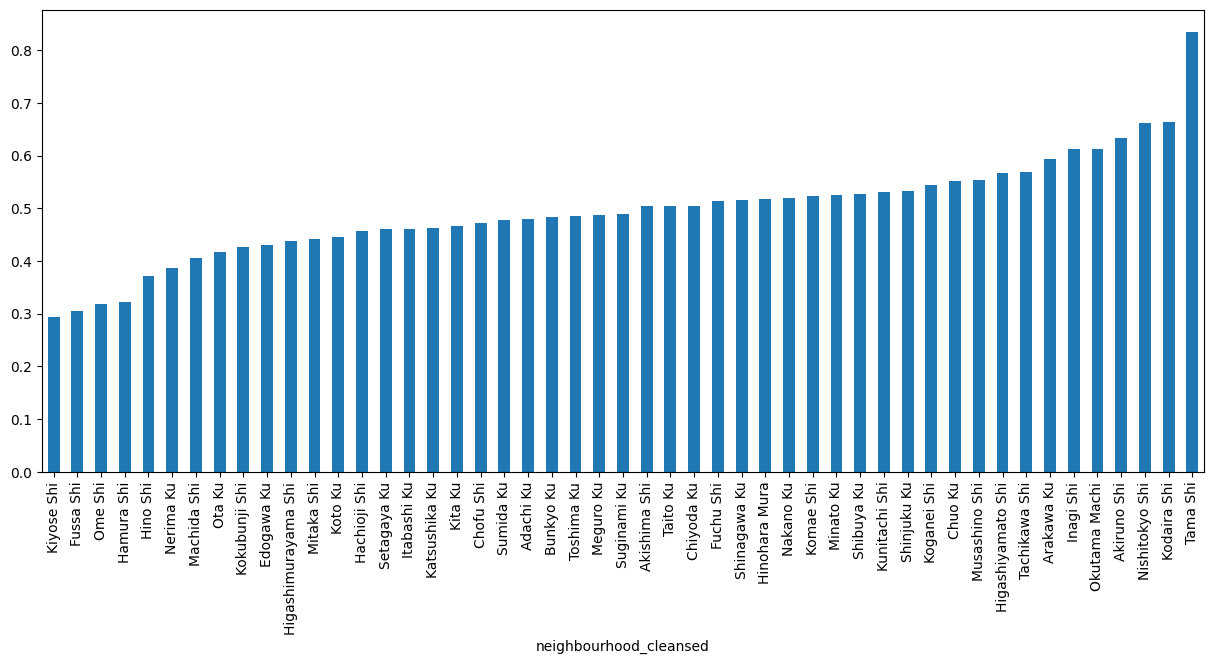

In [99]:
df_merged.groupby('neighbourhood_cleansed')['occupancy_rate'].mean().sort_values(ascending=True).plot(kind='bar',figsize=(15,6))
#Occupancy Rate for listing district

In [100]:
df_listings[df_listings['neighbourhood_cleansed']=='Tama Shi']

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,estimated_revenue_l365d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,average_score_review
861,9001233,https://www.airbnb.com/rooms/9001233,20250627030533,2025-07-01,previous scrape,Private Sweet in Musician's Home with Piano,This is a quiet residential area of Tokyo subu...,The neighborhood was featured in a 1995 animat...,https://a0.muscache.com/pictures/d83aaae1-736c...,29543799,https://www.airbnb.com/users/show/29543799,Satoshi & Hitomi,2015-03-18,"Ogawa, Hiki District, Japan","We are married couple, Satoshi&Hitomi. We live...",within an hour,100.00,100.00,2,https://a0.muscache.com/im/pictures/user/19869...,https://a0.muscache.com/im/pictures/user/19869...,NaN,16.00,21.00,"['email', 'phone']",1,1,"Tama-shi, Tōkyō-to, Japan",Tama Shi,35.64,139.44,Private room in home,Private room,4,0.00,1 private bath,0.00,0.00,"[""TV with Chromecast, standard cable"", ""Wine g...",NaN,100,180,100.00,100.00,180.00,180.00,100.00,180.00,t,0,0,0,0,2025-07-01,122,0,0,0,0,0,NaN,2015-12-09,2023-02-17,4.98,4.98,4.99,4.98,5.00,4.73,4.93,M130001544,0,6,5,1,0,1.05,4.94
2712,30824602,https://www.airbnb.com/rooms/30824602,20250627030533,2025-07-01,previous scrape,"Cozy Tatami Studio in Tama, near Teikyo Univ.",Very simple cosy Tatami studio in Tama city ne...,"""Whisper of the Heart"" (Japanese: Mimi o Sumas...",https://a0.muscache.com/pictures/054c2261-7d0e...,29543799,https://www.airbnb.com/users/show/29543799,Satoshi & Hitomi,2015-03-18,"Ogawa, Hiki District, Japan","We are married couple, Satoshi&Hitomi. We live...",within an hour,100.00,100.00,2,https://a0.muscache.com/im/pictures/user/19869...,https://a0.muscache.com/im/pictures/user/19869...,NaN,16.00,21.00,"['email', 'phone']",1,1,"Tama-shi, Tōkyō-to, Japan",Tama Shi,35.64,139.43,Entire rental unit,Entire home/apt,1,0.00,1 bath,1.00,0.00,"[""Hair dryer"", ""Fast wifi \u2013 824 Mbps"", ""F...",NaN,33,180,33.00,33.00,180.00,180.00,33.00,180.00,t,0,0,0,0,2025-07-01,19,2,0,0,3,132,NaN,2019-03-28,2025-04-08,4.95,5.00,5.00,5.00,5.00,4.74,4.95,M130011605,0,6,5,1,0,0.25,4.95
3180,33718203,https://www.airbnb.com/rooms/33718203,20250627030533,2025-07-01,previous scrape,"TAMA, TKY: studio room near Teikyo, Chuo univ",This Tatami studio is renewed in 2020.<br />Ja...,"""Whisper of the Heart"" (Japanese: Mimi o Sumas...",https://a0.muscache.com/pictures/88d8ccad-7eb1...,29543799,https://www.airbnb.com/users/show/29543799,Satoshi & Hitomi,2015-03-18,"Ogawa, Hiki District, Japan","We are married couple, Satoshi&Hitomi. We live...",within an hour,100.00,100.00,2,https://a0.muscache.com/im/pictures/user/19869...,https://a0.muscache.com/im/pictures/user/19869...,NaN,16.00,21.00,"['email', 'phone']",1,1,"Tama-shi, Tokyo Prefecture, Japan",T

In [101]:
df_merged['property_type']=df_merged['property_type'].map({'Entire rental unit':'Entire home/apt','Entire serviced apartment':'Entire home/apt','Entire home':'Entire home/apt',
                'Shared room in hostel':'Shared room','Entire condo':'Entire home/apt','Shared room in bed and breakfast':'Shared room',
                'Room in hotel':'Hotel room','Private room in home':'Private room','Shared room in kezhan':'Shared room','Entire townhouse':'Entire home/apt',
                'Private room in rental unit':'Private room','Shared room in ryokan':'Shared room','Private room in hostel':'Private room','Entire villa':'Entire home/apt',
                'Shared room in hotel':'Shared room','Shared room in home':'Shared room','Entire loft':'Entire home/apt','Room in aparthotel':'Hotel room','Private room in guesthouse':'Private room',
                'Shared room in rental unit':'Shared room','Private room in condo':'Private room','Entire guest suite':'Entire home/apt','Private room in villa':'Private room',
                'Hut':'Entire home/apt','Private room in serviced apartment':'Private room','Tiny home':'Entire home/apt','Private room in religious building':'Private room',
                'Entire cabin':'Entire home/apt','Entire bungalow':'Entire home/apt','Entire guesthouse':'Entire home/apt','Room in boutique hotel':'Hotel room','Room in serviced apartment':'Private room',
                'Private room in cabin':'Private room','Private room in guest suite':'Private room','Shared room in hut':'Shared room','Room in hostel':'Private room',
                'Private room in bed and breakfast':'Private room','Private room in hut':'Private room','Private room in ryokan':'Private room','Room in ryokan':'Private room',
                'Room in rental unit':'Entire home/apt','Shared room in boutique hotel':'Shared room','Shared room in aparthotel':'Shared room','Entire place':'Entire home/apt',
                'Private room in townhouse':'Private room','Private room in resort':'Private room','Treehouse':'Private room','Entire vacation home':'Entire home/apt','Private room in tiny home':'Private room',
                'Private room in barn':'Private room','Private room in vacation home':'Private room','Private room in nature lodge':'Private room','Earthen home':'Entire home/apt',
                'Barn':'Private room','Entire cottage':'Entire home/apt','Entire chalet':'Entire home/apt','Private room in tower':'Private room','Shared room in guesthouse':'Shared room',
                'Private room in minsu':'Private room','Private room in kezhan':'Private room','Private room in bungalow':'Private room','Private room in tent':'Private room',
                'Tent':'Private room','Shipping container':'Private room'})

<Axes: xlabel='property_type'>

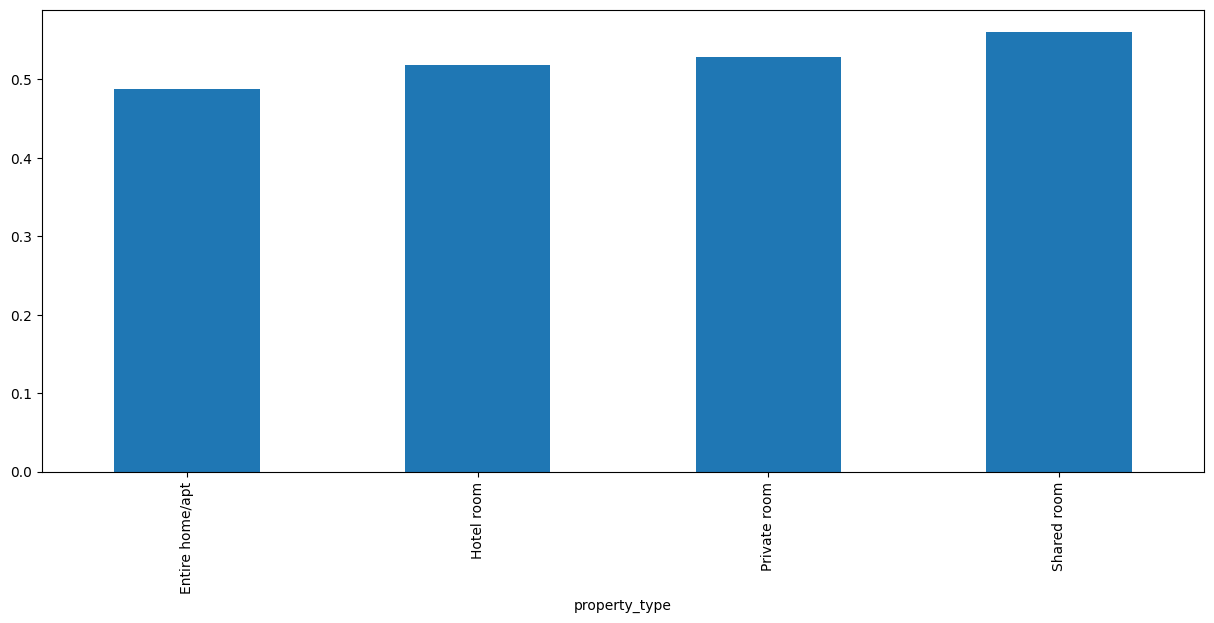

In [102]:
df_merged.groupby('property_type')['occupancy_rate'].mean().sort_values(ascending=True).plot(kind='bar',figsize=(15,6))
#Occupancy Rate for property types

## Occupancy rate and min booking day

In [103]:
df_merged['minimum_nights'].value_counts()

minimum_nights
1      11661
2       7429
30      2756
3       2215
4        442
5        196
28       144
31        93
7         66
6         64
32        50
20        49
14        23
29        23
25        13
10        12
15         8
60         6
100        6
180        5
18         5
8          4
365        4
200        3
21         3
90         2
16         2
27         2
26         2
33         1
50         1
24         1
35         1
55         1
62         1
92         1
360        1
40         1
Name: count, dtype: int64

In [104]:
df_merged.groupby(df_merged['minimum_nights']==1)['occupancy_rate'].mean().sort_values(ascending=True)

minimum_nights
False   0.48
True    0.51
Name: occupancy_rate, dtype: float64

In [105]:
df_merged.groupby(df_merged['minimum_nights']==2)['occupancy_rate'].mean().sort_values(ascending=True)

minimum_nights
False   0.49
True    0.51
Name: occupancy_rate, dtype: float64

In [106]:
df_merged.groupby(df_merged['minimum_nights']==30)['occupancy_rate'].mean().sort_values(ascending=True)

minimum_nights
True    0.41
False   0.50
Name: occupancy_rate, dtype: float64

# Pricing & Revenue Optimization

## Price between different district

<Axes: xlabel='neighbourhood_cleansed'>

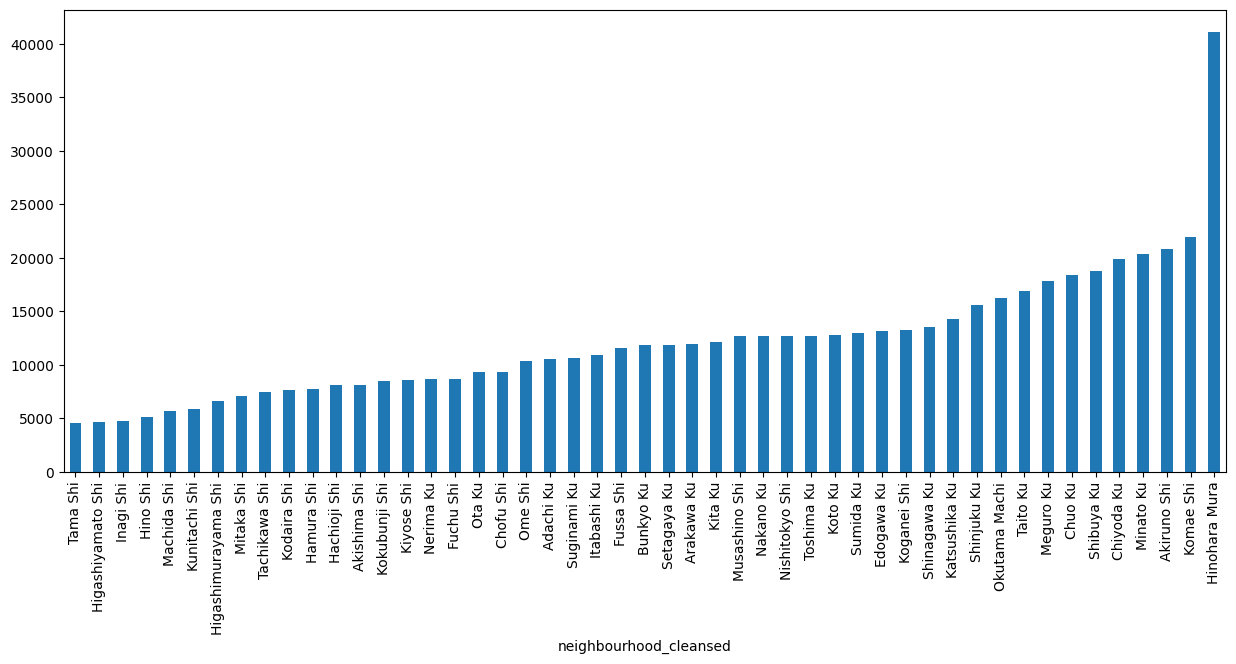

In [107]:
df_listings.groupby('neighbourhood_cleansed')['price'].median().sort_values(ascending=True).plot(kind='bar',figsize=(15,6))

<Axes: xlabel='neighbourhood_cleansed'>

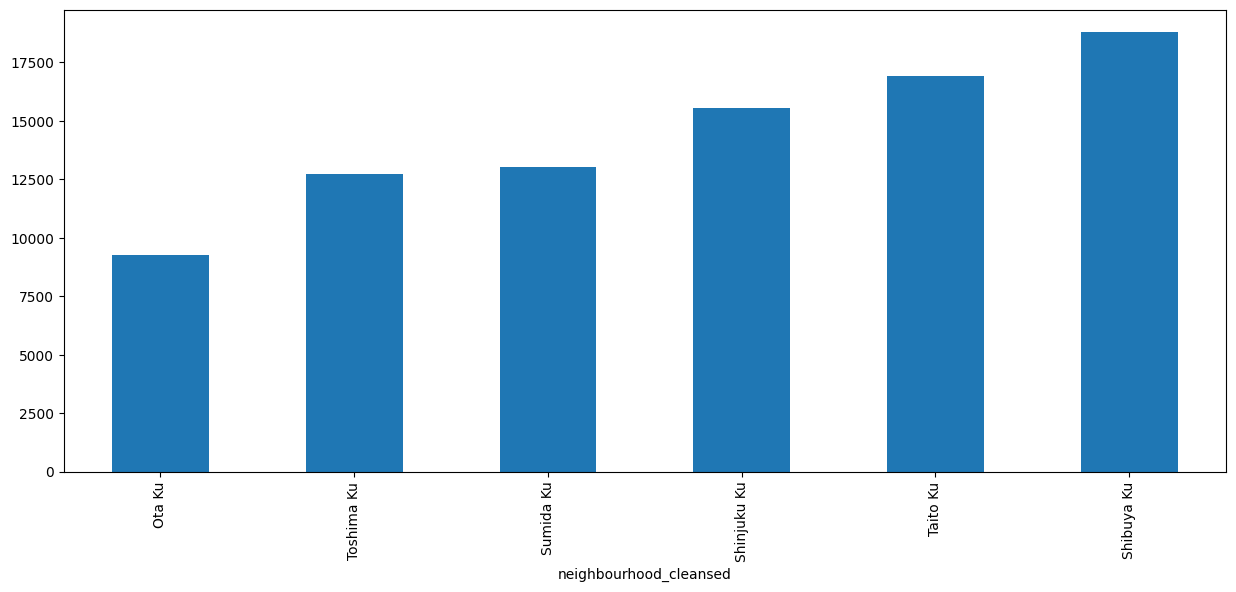

In [108]:
filter_listing.groupby('neighbourhood_cleansed')['price'].median().sort_values(ascending=True).plot(kind='bar',figsize=(15,6))

## Price between different room type

<Axes: xlabel='room_type'>

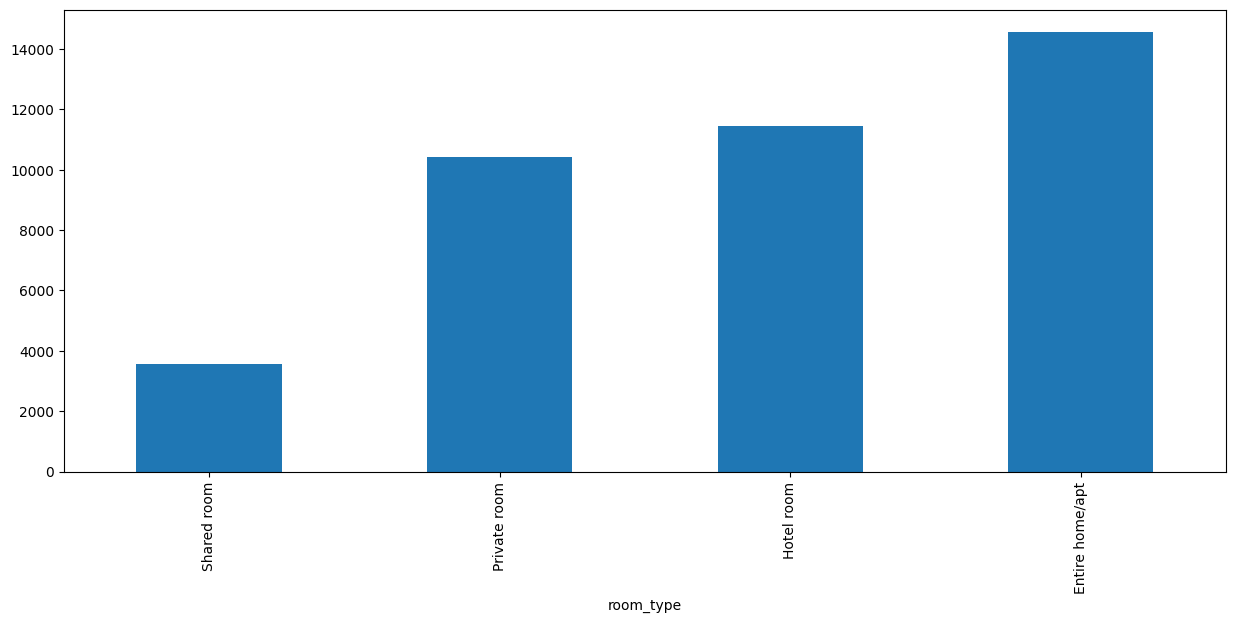

In [109]:
df_listings.groupby('room_type')['price'].median().sort_values(ascending=True).plot(kind='bar',figsize=(15,6))

<Axes: xlabel='room_type'>

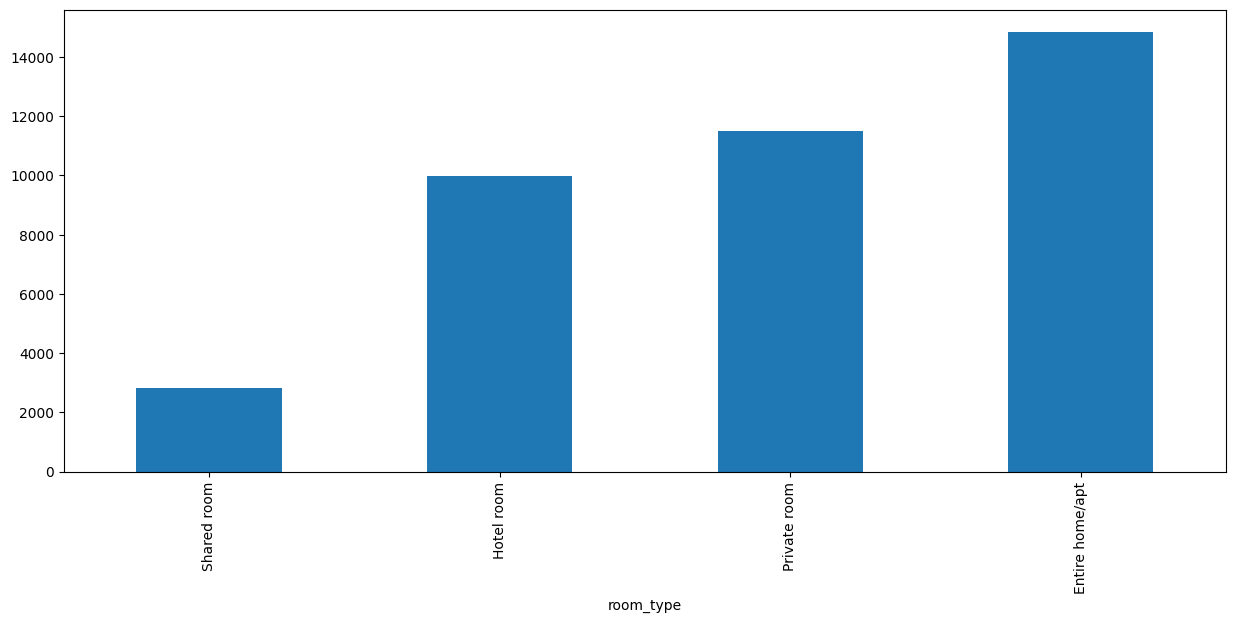

In [110]:
filter_listing.groupby('room_type')['price'].median().sort_values(ascending=True).plot(kind='bar',figsize=(15,6))

## Relationship between price and occupancy rate

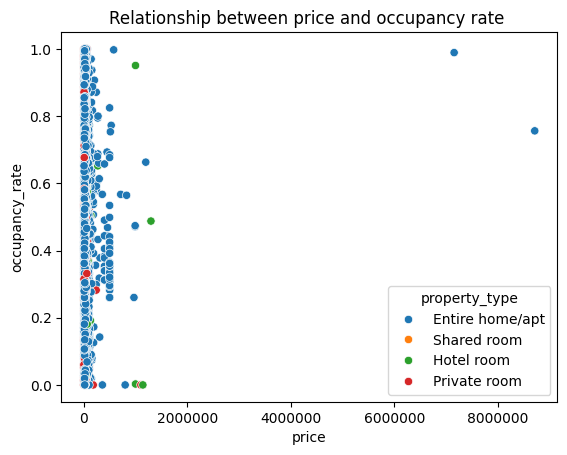

In [111]:
sns.scatterplot(data=df_merged,x="price",y="occupancy_rate",hue='property_type')
plt.title("Relationship between price and occupancy rate ")
plt.ticklabel_format(style='plain')
plt.show()

## Revenue rate between property types distribution

<Axes: xlabel='property_type'>

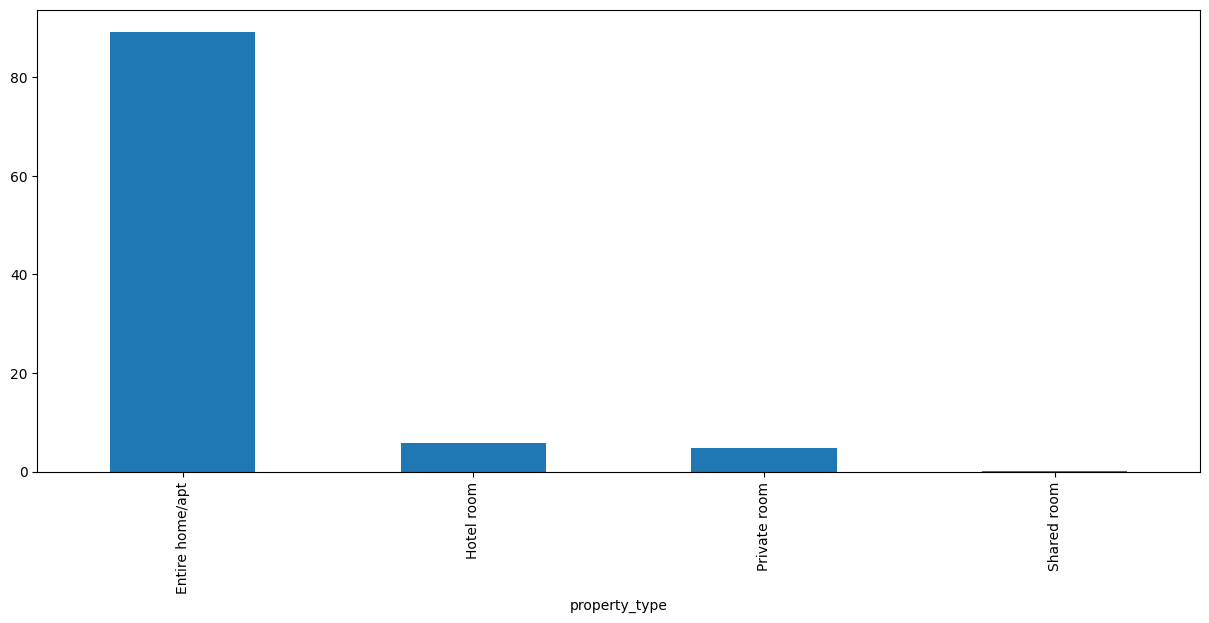

In [112]:
(df_merged.groupby('property_type')['revenue'].sum()/df_merged['revenue'].sum()*100).plot(kind='bar',figsize=(15,6))

## Price change between off-season & peak-season

In [113]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9233406 entries, 0 to 9233405
Data columns (total 86 columns):
 #   Column                                        Dtype  
---  ------                                        -----  
 0   id                                            int64  
 1   listing_url                                   object 
 2   scrape_id                                     int64  
 3   last_scraped                                  object 
 4   source                                        object 
 5   name                                          object 
 6   description                                   object 
 7   neighborhood_overview                         object 
 8   picture_url                                   object 
 9   host_id                                       int64  
 10  host_url                                      object 
 11  host_name                                     object 
 12  host_since                                    object 
 1

In [114]:
df_combined.head(2)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price_x,minimum_nights_x,maximum_nights_x,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,estimated_revenue_l365d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,listing_id,date,available,price_y,adjusted_price,minimum_nights_y,maximum_nights_y
0,1034638294163485758,https://www.airbnb.com/rooms/1034638294163485758,20250627030533,2025-06-28,city scrape,1K/6 min.walk from Korakuen Station/202,"4 lines available, new construction, close to ...","""Korakuen is home to the Tokyo Dome, a landmar...",https://a0.muscache.com/pictures/miso/Hosting-...,507235651,https://www.airbnb.com/users/show/507235651,Sumyca,2023-03-26,"Tokyo, Japan",わたしたち「Sumyca」は、スマホ1つで住宅、宿泊共に予約が完結する短期賃貸プラットフォー...,within an hour,100%,97%,f,https://a0.muscache.com/im/pictures/user/User-...,https://a0.muscache.com/im/pictures/user/User-...,NaN,74.00,76.00,['phone'],t,t,"Bunkyo City, Tokyo Prefecture, Japan",Bunkyo Ku,NaN,35.71,139.75,Entire rental unit,Entire home/apt,3,1.00,1 bath,0.00,2.00,"[""Bidet"", ""Body soap"", ""Bed linens"", ""Hot wate...",100000.00,30,365,30.00,30.00,365.00,365.00,30.00,365.00,NaN,t,16,46,76,251,2025-06-28,0,0,0,173,0,0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M130033302,t,74,74,0,0,NaN,1034638294163485758,2025-06-28,0,NaN,NaN,30,365
1,1034638294163485758,https://www.airbnb.com/rooms/1034638294163485758,20250627030533,2025-06-28,city scrape,1K/6 min.walk from Korakuen Station/202,"4 lines available, new construction, close to ...","""Korakuen is home to the Tokyo Dome, a landmar...",https://a0.muscache.com/pictures/miso/Hosting-...,507235651,https://www.airbnb.com/users/show/507235651,Sumyca,2023-03-26,"Tokyo, Japan",わたしたち「Sumyca」は、スマホ1つで住宅、宿泊共に予約が完結する短期賃貸プラットフォー...,within an hour,100%,97%,f,https://a0.muscache.com/im/pictures/user/User-...,https://a0.muscache.com/im/pictures/user/User-...,NaN,74.00,76.00,['phone'],t,t,"Bunkyo City, Tokyo Prefecture, Japan",Bunkyo Ku,NaN,35.71,139.75,Entire rental unit,Entire home/apt,3,1.00,1 bath,0.00,2.00,"[""Bidet"", ""Body soap"", ""Bed linens"", ""Hot wate...",100000.00,30,365,30.00,30.00,365.00,365.00,30.00,365.00,NaN,t,16,46,76,251,2025-06-28,0,0,0,173,0,0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M130033302,t,74,74,0,0,NaN,1034638294163485758,2025-06-29,0,NaN,NaN,30,365


In [ ]:
booked=df_combined[df_combined['available']==0]
booked['date']=pd.to_datetime(booked['date'])
booked['month']=booked['date'].dt.month
booked['year']=booked['date'].dt.year
booked2025=booked[booked['year']==2025]
booked2026=booked[booked['year']==2026]
D12025=booked2025[booked2025['neighbourhood_cleansed']=='Taito Ku']
D22025=booked2025[booked2025['neighbourhood_cleansed']=='Sumida Ku']
D32025=booked2025[booked2025['neighbourhood_cleansed']=='Shinjuku Ku']
D42025=booked2025[booked2025['neighbourhood_cleansed']=='Toshima Ku']
D52025=booked2025[booked2025['neighbourhood_cleansed']=='Minato Ku']
D62025=booked2025[booked2025['neighbourhood_cleansed']=='Shibuya Ku']
monthly_total_revenue2025=booked2025.groupby('month')['price_x'].sum().reset_index()
monthly_D1_revenue2025=D12025.groupby('month')['price_x'].sum().reset_index()
monthly_D2_revenue2025=D22025.groupby('month')['price_x'].sum().reset_index()
monthly_D3_revenue2025=D32025.groupby('month')['price_x'].sum().reset_index()
monthly_D4_revenue2025=D42025.groupby('month')['price_x'].sum().reset_index()
monthly_D5_revenue2025=D52025.groupby('month')['price_x'].sum().reset_index()
monthly_D6_revenue2025=D62025.groupby('month')['price_x'].sum().reset_index()

plt.figure(figsize=(15,5))
plt.plot(monthly_total_revenue2025['month'],monthly_total_revenue2025['price_x'],marker='o',linewidth=2)
plt.plot(monthly_D1_revenue2025['month'],monthly_D1_revenue2025['price_x'],marker='o',linewidth=2,color='red',label="Taito Ku")
plt.plot(monthly_D2_revenue2025['month'],monthly_D2_revenue2025['price_x'],marker='o',linewidth=2,color='yellow',label="Sumida Ku")
plt.plot(monthly_D3_revenue2025['month'],monthly_D3_revenue2025['price_x'],marker='o',linewidth=2,color='blue',label="Shinjuku Ku")
plt.plot(monthly_D4_revenue2025['month'],monthly_D4_revenue2025['price_x'],marker='o',linewidth=2,color='orange',label="Toshima Ku")
plt.plot(monthly_D5_revenue2025['month'],monthly_D5_revenue2025['price_x'],marker='o',linewidth=2,color='green',label="Minato Ku")
plt.plot(monthly_D6_revenue2025['month'],monthly_D6_revenue2025['price_x'],marker='o',linewidth=2,color='black',label="Shibuya Ku")

plt.title('Total Monthly Revenue Trend (2025)',fontsize=14)
plt.xlabel('Month',fontsize=12)
plt.ylabel('Total Revenue',fontsize=12)
plt.grid(alpha=0.3)

plt.axvspan(3,4,color='pink',alpha=0.3,label='Sakura Season')
plt.axvspan(4,5,color='yellow',alpha=0.3,label='Golden Week')
plt.axvspan(7,8,color='red',alpha=0.3,label='Summer Festival')
plt.axvspan(10.8,12,color='orange',alpha=0.3,label='Maple Festival')

plt.ticklabel_format(style='plain')
plt.xticks(range(1,13))
plt.legend()
plt.tight_layout()
plt.show()

C:\Users\hangk\AppData\Local\Temp\ipykernel_42840\4181839820.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  booked['date']=pd.to_datetime(booked['date'])
C:\Users\hangk\AppData\Local\Temp\ipykernel_42840\4181839820.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  booked['month']=booked['date'].dt.month
C:\Users\hangk\AppData\Local\Temp\ipykernel_42840\4181839820.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

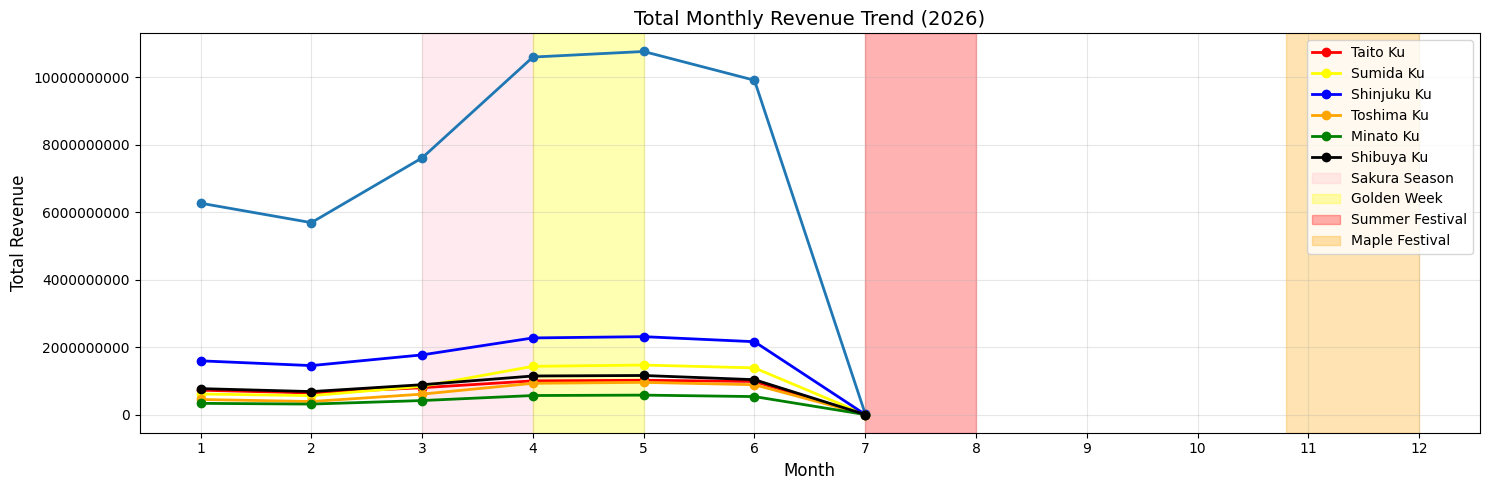

In [ ]:
monthly_revenue2026=booked2026.groupby('month')['price_x'].sum().reset_index()
D12026=booked2026[booked2026['neighbourhood_cleansed']=='Taito Ku']
D22026=booked2026[booked2026['neighbourhood_cleansed']=='Sumida Ku']
D32026=booked2026[booked2026['neighbourhood_cleansed']=='Shinjuku Ku']
D42026=booked2026[booked2026['neighbourhood_cleansed']=='Toshima Ku']
D52026=booked2026[booked2026['neighbourhood_cleansed']=='Minato Ku']
D62026=booked2026[booked2026['neighbourhood_cleansed']=='Shibuya Ku']
monthly_D1_revenue2026=D12026.groupby('month')['price_x'].sum().reset_index()
monthly_D2_revenue2026=D22026.groupby('month')['price_x'].sum().reset_index()
monthly_D3_revenue2026=D32026.groupby('month')['price_x'].sum().reset_index()
monthly_D4_revenue2026=D42026.groupby('month')['price_x'].sum().reset_index()
monthly_D5_revenue2026=D52026.groupby('month')['price_x'].sum().reset_index()
monthly_D6_revenue2026=D62026.groupby('month')['price_x'].sum().reset_index()

plt.figure(figsize=(15,5))
plt.plot(monthly_revenue2026['month'],monthly_revenue2026['price_x'],marker='o',linewidth=2)
plt.plot(monthly_D1_revenue2026['month'],monthly_D1_revenue2026['price_x'],marker='o',linewidth=2,color='red',label="Taito Ku")
plt.plot(monthly_D2_revenue2026['month'],monthly_D2_revenue2026['price_x'],marker='o',linewidth=2,color='yellow',label="Sumida Ku")
plt.plot(monthly_D3_revenue2026['month'],monthly_D3_revenue2026['price_x'],marker='o',linewidth=2,color='blue',label="Shinjuku Ku")
plt.plot(monthly_D4_revenue2026['month'],monthly_D4_revenue2026['price_x'],marker='o',linewidth=2,color='orange',label="Toshima Ku")
plt.plot(monthly_D5_revenue2026['month'],monthly_D5_revenue2026['price_x'],marker='o',linewidth=2,color='green',label="Minato Ku")
plt.plot(monthly_D6_revenue2026['month'],monthly_D6_revenue2026['price_x'],marker='o',linewidth=2,color='black',label="Shibuya Ku")

plt.title('Total Monthly Revenue Trend (2026)',fontsize=14)
plt.xlabel('Month',fontsize=12)
plt.ylabel('Total Revenue',fontsize=12)
plt.grid(alpha=0.3)

plt.axvspan(3,4,color='pink',alpha=0.3,label='Sakura Season')
plt.axvspan(4,5,color='yellow',alpha=0.3,label='Golden Week')
plt.axvspan(7,8,color='red',alpha=0.3,label='Summer Festival')
plt.axvspan(10.8,12,color='orange',alpha=0.3,label='Maple Festival')

plt.ticklabel_format(style='plain')
plt.xticks(range(1,13))
plt.legend()
plt.tight_layout()
plt.show()

## Revenue between different property type

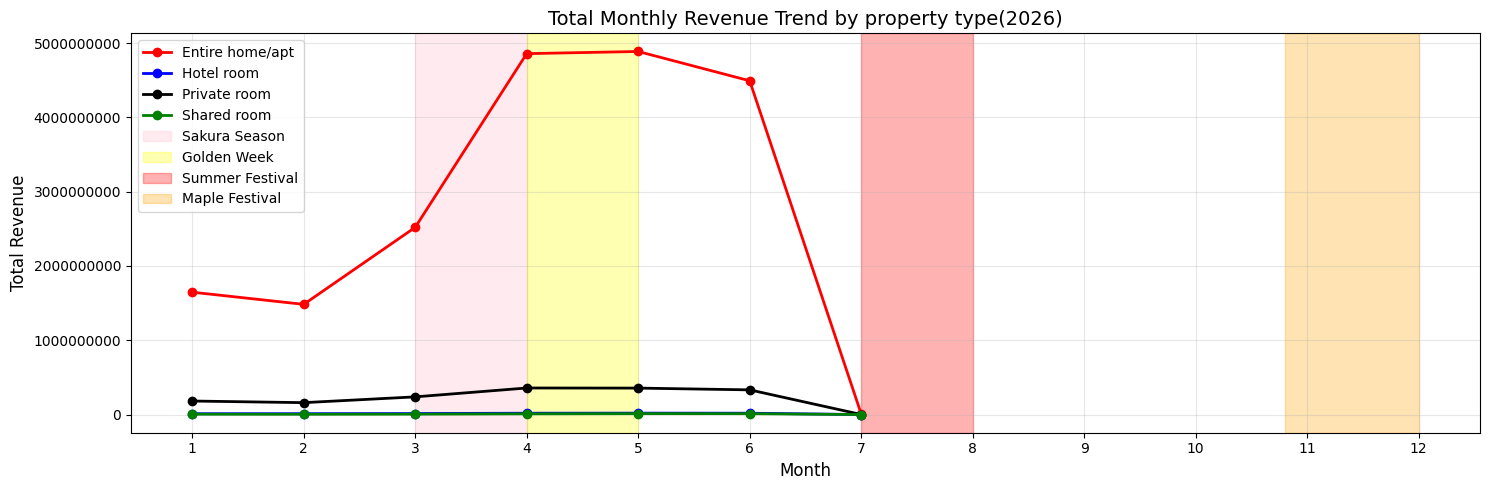

In [ ]:
t12026=booked2026[booked2026['room_type']=='Entire home/apt']
t22026=booked2026[booked2026['room_type']=='Hotel room']
t32026=booked2026[booked2026['room_type']=='Private room']
t42026=booked2026[booked2026['room_type']=='Shared room']
t1_monthly_revenue2026=t12026.groupby('month')['price_x'].sum().reset_index()
t2_monthly_revenue2026=t22026.groupby('month')['price_x'].sum().reset_index()
t3_monthly_revenue2026=t32026.groupby('month')['price_x'].sum().reset_index()
t4_monthly_revenue2026=t42026.groupby('month')['price_x'].sum().reset_index()

plt.figure(figsize=(15,5))
plt.plot(t1_monthly_revenue2026['month'],t1_monthly_revenue2026['price_x'],marker='o',linewidth=2,color='red',label="Entire home/apt")
plt.plot(t2_monthly_revenue2026['month'],t2_monthly_revenue2026['price_x'],marker='o',linewidth=2,color='blue',label="Hotel room")
plt.plot(t3_monthly_revenue2026['month'],t3_monthly_revenue2026['price_x'],marker='o',linewidth=2,color='black',label="Private room")
plt.plot(t4_monthly_revenue2026['month'],t4_monthly_revenue2026['price_x'],marker='o',linewidth=2,color='green',label="Shared room")

plt.title('Total Monthly Revenue Trend by property type(2026)',fontsize=14)
plt.xlabel('Month',fontsize=12)
plt.ylabel('Total Revenue',fontsize=12)
plt.grid(alpha=0.3)

plt.axvspan(3,4,color='pink',alpha=0.3,label='Sakura Season')
plt.axvspan(4,5,color='yellow',alpha=0.3,label='Golden Week')
plt.axvspan(7,8,color='red',alpha=0.3,label='Summer Festival')
plt.axvspan(10.8,12,color='orange',alpha=0.3,label='Maple Festival')

plt.ticklabel_format(style='plain')
plt.xticks(range(1,13))
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
filter_listing['neighbourhood_cleansed'].unique()

array(['Taito Ku', 'Sumida Ku', 'Shinjuku Ku', 'Toshima Ku', 'Ota Ku',
       'Shibuya Ku'], dtype=object)

In [ ]:
df_merged.head(2)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,estimated_revenue_l365d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,average_score_review,total_days,booked_days,Booking_price,occupancy_rate,revenue
0,1034638294163485758,https://www.airbnb.com/rooms/1034638294163485758,20250627030533,2025-06-28,city scrape,1K/6 min.walk from Korakuen Station/202,"4 lines available, new construction, close to ...","""Korakuen is home to the Tokyo Dome, a landmar...",https://a0.muscache.com/pictures/miso/Hosting-...,507235651,https://www.airbnb.com/users/show/507235651,Sumyca,2023-03-26,"Tokyo, Japan",わたしたち「Sumyca」は、スマホ1つで住宅、宿泊共に予約が完結する短期賃貸プラットフォー...,within an hour,100.00,97.00,0,https://a0.muscache.com/im/pictures/user/User-...,https://a0.muscache.com/im/pictures/user/User-...,NaN,74.00,76.00,['phone'],1,1,"Bunkyo City, Tokyo Prefecture, Japan",Bunkyo Ku,35.71,139.75,Entire home/apt,Entire home/apt,3,1.00,1 bath,0.00,2.00,"[""Bidet"", ""Body soap"", ""Bed linens"", ""Hot wate...",100000.00,30,365,30.00,30.00,365.00,365.00,30.00,365.00,t,16,46,76,251,2025-06-28,0,0,0,173,0,0,0.00,NaT,NaT,4.72,4.76,4.71,4.79,4.83,4.71,4.67,M130033302,1,74,74,0,0,0.00,4.74,365,114,100000.00,0.31,11400000.00
1,1034640917459370080,https://www.airbnb.com/rooms/1034640917459370080,20250627030533,2025-06-28,city scrape,Near Tokyo Dome/6 min. walk from Korakuen/d01,"4 lines available, new construction, close to ...","Korakuen is home to the Tokyo Dome, a landmark...",https://a0.muscache.com/pictures/miso/Hosting-...,507235651,https://www.airbnb.com/users/show/507235651,Sumyca,2023-03-26,"Tokyo, Japan",わたしたち「Sumyca」は、スマホ1つで住宅、宿泊共に予約が完結する短期賃貸プラットフォー...,within an hour,100.00,97.00,0,https://a0.muscache.com/im/pictures/user/User-...,https://a0.muscache.com/im/pictures/user/User-...,NaN,74.00,76.00,['phone'],1,1,"Bunkyo City, Tokyo Prefecture, Japan",Bunkyo Ku,35.71,139.75,Entire home/apt,Entire home/apt,8,1.00,1 bath,2.00,5.00,"[""Bidet"", ""Body soap"", ""Bed linens"", ""Hot wate...",100000.00,30,365,30.00,30.00,365.00,365.00,30.00,365.00,t,2,27,57,237,2025-06-28,0,0,0,154,0,0,0.00,NaT,NaT,4.72,4.76,4.71,4.79,4.83,4.71,4.67,M130033307,1,74,74,0,0,0.00,4.74,365,128,100000.00,0.35,12800000.00


In [ ]:
df_merged.groupby('neighbourhood_cleansed')['revenue'].sum().sort_values(ascending=False) / df_merged['revenue'].sum()

neighbourhood_cleansed
Shinjuku Ku           0.23
Shibuya Ku            0.12
Sumida Ku             0.12
Taito Ku              0.10
Toshima Ku            0.08
Minato Ku             0.05
Adachi Ku             0.03
Setagaya Ku           0.03
Kita Ku               0.03
Katsushika Ku         0.02
Nakano Ku             0.02
Ota Ku                0.02
Suginami Ku           0.02
Arakawa Ku            0.02
Edogawa Ku            0.02
Koto Ku               0.01
Shinagawa Ku          0.01
Bunkyo Ku             0.01
Chuo Ku               0.01
Itabashi Ku           0.01
Chiyoda Ku            0.01
Meguro Ku             0.01
Nerima Ku             0.00
Musashino Shi         0.00
Akiruno Shi           0.00
Hachioji Shi          0.00
Ome Shi               0.00
Mitaka Shi            0.00
Machida Shi           0.00
Chofu Shi             0.00
Komae Shi             0.00
Nishitokyo Shi        0.00
Kokubunji Shi         0.00
Fuchu Shi             0.00
Hino Shi              0.00
Koganei Shi           0.00
Kodai

In [ ]:
print(f'Minato Ku occupancy rate: {df_merged[df_merged['neighbourhood_cleansed']=='Minato Ku']['occupancy_rate'].mean().round(2)*100}%')
print(f'Shinjuku Ku occupancy rate: {df_merged[df_merged['neighbourhood_cleansed']=='Shinjuku Ku']['occupancy_rate'].mean().round(2)*100}%')
print(f'Toshima Ku occupancy rate: {df_merged[df_merged['neighbourhood_cleansed']=='Toshima Ku']['occupancy_rate'].mean().round(2)*100}%')
print(f'Sumida Ku occupancy rate: {df_merged[df_merged['neighbourhood_cleansed']=='Sumida Ku']['occupancy_rate'].mean().round(2)*100}%')
print(f'Shibuya Ku occupancy rate: {df_merged[df_merged['neighbourhood_cleansed']=='Shibuya Ku']['occupancy_rate'].mean().round(2)*100}%')
print(f'Taito Ku occupancy rate: {df_merged[df_merged['neighbourhood_cleansed']=='Taito Ku']['occupancy_rate'].mean().round(2)*100}%')

Minato Ku occupancy rate: 52.0%
Shinjuku Ku occupancy rate: 53.0%
Toshima Ku occupancy rate: 49.0%
Sumida Ku occupancy rate: 48.0%
Shibuya Ku occupancy rate: 53.0%
Taito Ku occupancy rate: 50.0%


In [ ]:
print(f'Minato Ku median price: {df_merged[df_merged['neighbourhood_cleansed']=='Minato Ku']['price'].median()}')
print(f'Shinjuku Ku median price: {df_merged[df_merged['neighbourhood_cleansed']=='Shinjuku Ku']['price'].median()}')
print(f'Toshima Ku median price: {df_merged[df_merged['neighbourhood_cleansed']=='Toshima Ku']['price'].median()}')
print(f'Sumida Ku median price: {df_merged[df_merged['neighbourhood_cleansed']=='Sumida Ku']['price'].median()}')
print(f'Shibuya Ku median price: {df_merged[df_merged['neighbourhood_cleansed']=='Shibuya Ku']['price'].median()}')
print(f'Taito Ku median price: {df_merged[df_merged['neighbourhood_cleansed']=='Taito Ku']['price'].median()}')

Minato Ku median price: 20393.0
Shinjuku Ku median price: 15558.0
Toshima Ku median price: 12715.0
Sumida Ku median price: 13015.0
Shibuya Ku median price: 18808.0
Taito Ku median price: 16940.5


In [ ]:
minato_data=df_merged[df_merged['neighbourhood_cleansed']=='Minato Ku']
print(f'Minato Ku >= 30 nights minimum nights occupancy rate: {minato_data[minato_data['minimum_nights']>=30]['occupancy_rate'].mean().round(2)*100}%')
print(f'Minato Ku 1-7 nights minimum nights occupancy rate: {minato_data[(minato_data['minimum_nights']>=1) & (minato_data['minimum_nights']<=7)]['occupancy_rate'].mean().round(2)*100}%')
print('------------------------')
shinjuku_data=df_merged[df_merged['neighbourhood_cleansed']=='Shinjuku Ku']
print(f'Shinjuku Ku >= 30 nights minimum nights occupancy rate: {shinjuku_data[shinjuku_data['minimum_nights']>=30]['occupancy_rate'].mean().round(2)*100}%')
print(f'Shinjuku Ku 1-7 nights minimum nights occupancy rate: {shinjuku_data[(shinjuku_data['minimum_nights']>=1) & (shinjuku_data['minimum_nights']<=7)]['occupancy_rate'].mean().round(2)*100}%')
print('------------------------')
toshima_data=df_merged[df_merged['neighbourhood_cleansed']=='Toshima Ku']
print(f'Toshima Ku >= 30 nights minimum nights occupancy rate: {toshima_data[toshima_data['minimum_nights']>=30]['occupancy_rate'].mean().round(2)*100}%')
print(f'Toshima Ku 1-7 nights minimum nights occupancy rate: {toshima_data[(toshima_data['minimum_nights']>=1) & (toshima_data['minimum_nights']<=7)]['occupancy_rate'].mean().round(2)*100}%')
print('------------------------')
sumida_data=df_merged[df_merged['neighbourhood_cleansed']=='Sumida Ku']
print(f'Sumida Ku >= 30 nights minimum nights occupancy rate: {sumida_data[sumida_data['minimum_nights']>=30]['occupancy_rate'].mean().round(2)*100}%')
print(f'Sumida Ku 1-7 nights minimum nights occupancy rate: {sumida_data[(sumida_data['minimum_nights']>=1) & (sumida_data['minimum_nights']<=7)]['occupancy_rate'].mean().round(2)*100}%')
print('------------------------')
shibuya_data=df_merged[df_merged['neighbourhood_cleansed']=='Shibuya Ku']
print(f'Shibuya Ku >= 30 nights minimum nights occupancy rate: {shibuya_data[shibuya_data['minimum_nights']>=30]['occupancy_rate'].mean().round(2)*100}%')
print(f'Shibuya Ku 1-7 nights minimum nights occupancy rate: {shibuya_data[(shibuya_data['minimum_nights']>=1) & (shibuya_data['minimum_nights']<=7)]['occupancy_rate'].mean().round(2)*100}%')
print('------------------------')
taito_data=df_merged[df_merged['neighbourhood_cleansed']=='Taito Ku']
print(f'Taito Ku >= 30 nights minimum nights occupancy rate: {taito_data[taito_data['minimum_nights']>=30]['occupancy_rate'].mean().round(2)*100}%')
print(f'Taito Ku 1-7 nights minimum nights occupancy rate: {taito_data[(taito_data['minimum_nights']>=1) & (taito_data['minimum_nights']<=7)]['occupancy_rate'].mean().round(2)*100}%')

Minato Ku >= 30 nights minimum nights occupancy rate: 42.0%
Minato Ku 1-7 nights minimum nights occupancy rate: 54.0%
------------------------
Shinjuku Ku >= 30 nights minimum nights occupancy rate: 40.0%
Shinjuku Ku 1-7 nights minimum nights occupancy rate: 55.00000000000001%
------------------------
Toshima Ku >= 30 nights minimum nights occupancy rate: 42.0%
Toshima Ku 1-7 nights minimum nights occupancy rate: 50.0%
------------------------
Sumida Ku >= 30 nights minimum nights occupancy rate: 40.0%
Sumida Ku 1-7 nights minimum nights occupancy rate: 49.0%
------------------------
Shibuya Ku >= 30 nights minimum nights occupancy rate: 42.0%
Shibuya Ku 1-7 nights minimum nights occupancy rate: 54.0%
------------------------
Taito Ku >= 30 nights minimum nights occupancy rate: 43.0%
Taito Ku 1-7 nights minimum nights occupancy rate: 51.0%


In [ ]:
df_merged.groupby('neighbourhood_cleansed')['id'].nunique().sort_values(ascending=False)

neighbourhood_cleansed
Shinjuku Ku            4701
Sumida Ku              3556
Taito Ku               2646
Toshima Ku             2501
Shibuya Ku             1681
Ota Ku                 1135
Minato Ku               989
Setagaya Ku             887
Katsushika Ku           803
Kita Ku                 788
Nakano Ku               778
Suginami Ku             573
Edogawa Ku              520
Koto Ku                 463
Bunkyo Ku               450
Itabashi Ku             441
Adachi Ku               404
Shinagawa Ku            391
Chuo Ku                 344
Chiyoda Ku              254
Arakawa Ku              234
Meguro Ku               136
Nerima Ku               118
Musashino Shi            72
Hachioji Shi             45
Mitaka Shi               44
Machida Shi              38
Ome Shi                  34
Chofu Shi                30
Akiruno Shi              27
Hino Shi                 25
Kokubunji Shi            23
Fuchu Shi                20
Komae Shi                16
Higashimurayama Shi      

In [ ]:
print(f'Minato Ku listing number: {df_merged[df_merged['neighbourhood_cleansed']=='Minato Ku']['id'].nunique()}')
print(f'Shinjuku Ku listing number: {df_merged[df_merged['neighbourhood_cleansed']=='Shinjuku Ku']['id'].nunique()}')
print(f'Toshima Ku listing number: {df_merged[df_merged['neighbourhood_cleansed']=='Toshima Ku']['id'].nunique()}')
print(f'Sumida Ku listing number: {df_merged[df_merged['neighbourhood_cleansed']=='Sumida Ku']['id'].nunique()}')
print(f'Shibuya Ku listing number: {df_merged[df_merged['neighbourhood_cleansed']=='Shibuya Ku']['id'].nunique()}')
print(f'Taito Ku listing number: {df_merged[df_merged['neighbourhood_cleansed']=='Taito Ku']['id'].nunique()}')

Minato Ku listing number: 989
Shinjuku Ku listing number: 4701
Toshima Ku listing number: 2501
Sumida Ku listing number: 3556
Shibuya Ku listing number: 1681
Taito Ku listing number: 2646


In [ ]:
# df_listings202503=pd.read_csv('listings202503.csv')
# df_calendar202503=pd.read_csv('calendar202503.csv')
# df_combined2=pd.merge(df_listings202503,df_calendar202503,left_on='id',right_on='listing_id',how='left')

In [ ]:
# df_combined2.dropna(subset='available',inplace=True)
# df_combined2['available']=df_combined2['available'].map({'f':0,'t':1})
# df_combined2['price_x']=df_combined2['price_x'].replace('[$,]','',regex=True)
# df_combined2.head(3)

In [ ]:
# booked2=df_combined2[df_combined2['available']==0]
# booked2['date']=pd.to_datetime(booked2['date'])
# booked2['month']=booked2['date'].dt.month
# booked2['year']=booked2['date'].dt.year
# booked20250103=booked2[booked2['year']==2025]
# booked2024=booked2[booked2['year']==2024]

# t120250103=booked20250103[booked20250103['room_type']=='Entire home/apt']
# t220250103=booked20250103[booked20250103['room_type']=='Hotel room']
# t320250103=booked20250103[booked20250103['room_type']=='Private room']
# t420250103=booked20250103[booked20250103['room_type']=='Shared room']

# t120250103['price_x']=t120250103['price_x'].astype(float)
# t220250103['price_x']=t220250103['price_x'].astype(float)
# t320250103['price_x']=t320250103['price_x'].astype(float)
# t420250103['price_x']=t420250103['price_x'].astype(float)
# t120250103['price_x'].info()


In [ ]:
# t1_monthly_revenue20250103=t120250103.groupby('month')['price_x'].sum().reset_index()
# t2_monthly_revenue20250103=t220250103.groupby('month')['price_x'].sum().reset_index()
# t3_monthly_revenue20250103=t320250103.groupby('month')['price_x'].sum().reset_index()
# t4_monthly_revenue20250103=t420250103.groupby('month')['price_x'].sum().reset_index()

In [ ]:
# t420250103['date'].sort_values()

In [ ]:
# plt.figure(figsize=(15,5))
# plt.plot(t1_monthly_revenue20250103['month'],t1_monthly_revenue20250103['price_x'],marker='o',linewidth=2,color='red',label="Entire home/apt")
# plt.plot(t2_monthly_revenue20250103['month'],t2_monthly_revenue20250103['price_x'],marker='o',linewidth=2,color='blue',label="Hotel room")
# plt.plot(t3_monthly_revenue20250103['month'],t3_monthly_revenue20250103['price_x'],marker='o',linewidth=2,color='black',label="Private room")
# plt.plot(t4_monthly_revenue20250103['month'],t4_monthly_revenue20250103['price_x'],marker='o',linewidth=2,color='green',label="Shared room")

# plt.title('Total Monthly Revenue Trend by property type(2025)',fontsize=14)
# plt.xlabel('Month',fontsize=12)
# plt.ylabel('Total Revenue',fontsize=12)
# plt.grid(alpha=0.3)

# plt.axvspan(3,4,color='pink',alpha=0.3,label='Sakura Season')
# plt.axvspan(4,5,color='yellow',alpha=0.3,label='Golden Week')
# plt.axvspan(7,8,color='red',alpha=0.3,label='Summer Festival')
# plt.axvspan(10.8,12,color='orange',alpha=0.3,label='Maple Festival')

# plt.ticklabel_format(style='plain')
# plt.xticks(range(1,13))
# plt.legend()
# plt.tight_layout()
# plt.show()

## Min booking day and revenue

In [ ]:
df_combined.head(2)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price_x,minimum_nights_x,maximum_nights_x,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,estimated_revenue_l365d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,listing_id,date,available,price_y,adjusted_price,minimum_nights_y,maximum_nights_y
0,1034638294163485758,https://www.airbnb.com/rooms/1034638294163485758,20250627030533,2025-06-28,city scrape,1K/6 min.walk from Korakuen Station/202,"4 lines available, new construction, close to ...","""Korakuen is home to the Tokyo Dome, a landmar...",https://a0.muscache.com/pictures/miso/Hosting-...,507235651,https://www.airbnb.com/users/show/507235651,Sumyca,2023-03-26,"Tokyo, Japan",わたしたち「Sumyca」は、スマホ1つで住宅、宿泊共に予約が完結する短期賃貸プラットフォー...,within an hour,100%,97%,f,https://a0.muscache.com/im/pictures/user/User-...,https://a0.muscache.com/im/pictures/user/User-...,NaN,74.00,76.00,['phone'],t,t,"Bunkyo City, Tokyo Prefecture, Japan",Bunkyo Ku,NaN,35.71,139.75,Entire rental unit,Entire home/apt,3,1.00,1 bath,0.00,2.00,"[""Bidet"", ""Body soap"", ""Bed linens"", ""Hot wate...",100000.00,30,365,30.00,30.00,365.00,365.00,30.00,365.00,NaN,t,16,46,76,251,2025-06-28,0,0,0,173,0,0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M130033302,t,74,74,0,0,NaN,1034638294163485758,2025-06-28,0,NaN,NaN,30,365
1,1034638294163485758,https://www.airbnb.com/rooms/1034638294163485758,20250627030533,2025-06-28,city scrape,1K/6 min.walk from Korakuen Station/202,"4 lines available, new construction, close to ...","""Korakuen is home to the Tokyo Dome, a landmar...",https://a0.muscache.com/pictures/miso/Hosting-...,507235651,https://www.airbnb.com/users/show/507235651,Sumyca,2023-03-26,"Tokyo, Japan",わたしたち「Sumyca」は、スマホ1つで住宅、宿泊共に予約が完結する短期賃貸プラットフォー...,within an hour,100%,97%,f,https://a0.muscache.com/im/pictures/user/User-...,https://a0.muscache.com/im/pictures/user/User-...,NaN,74.00,76.00,['phone'],t,t,"Bunkyo City, Tokyo Prefecture, Japan",Bunkyo Ku,NaN,35.71,139.75,Entire rental unit,Entire home/apt,3,1.00,1 bath,0.00,2.00,"[""Bidet"", ""Body soap"", ""Bed linens"", ""Hot wate...",100000.00,30,365,30.00,30.00,365.00,365.00,30.00,365.00,NaN,t,16,46,76,251,2025-06-28,0,0,0,173,0,0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M130033302,t,74,74,0,0,NaN,1034638294163485758,2025-06-29,0,NaN,NaN,30,365


In [ ]:
df_combined['minimum_nights_x'].value_counts()

minimum_nights_x
1      4256265
2      2711586
30     1005940
3       808475
4       161330
5        71540
28       52560
31       33945
7        24090
6        23360
32       18250
20       17885
14        8395
29        8395
25        4745
10        4380
15        2920
60        2190
100       2190
180       1825
18        1825
8         1460
365       1460
200       1095
21        1095
90         730
16         730
27         730
26         730
33         365
50         365
24         365
35         365
55         365
62         365
92         365
360        365
40         365
Name: count, dtype: int64

In [ ]:
df_combined[df_combined['minimum_nights_x']==1]['price_x'].count()

np.int64(3849290)

In [ ]:
(df_merged[df_merged['minimum_nights']==1]['price'].sum())/(df_merged['price'].sum())*100

np.float64(41.712952268168216)

In [ ]:
(df_combined[df_combined['minimum_nights_x']<=7]['price_x'].sum())/(df_combined['price_x'].sum())*100

np.float64(84.77169112018541)

In [ ]:
(df_merged[df_merged['minimum_nights']==2]['price'].sum())/(df_merged['price'].sum())*100

np.float64(31.08680975700407)

In [ ]:
(df_combined[df_combined['minimum_nights_x']==2]['price_x'].sum())/(df_combined['price_x'].sum())*100

np.float64(31.086812263960617)

In [ ]:
(df_merged[df_merged['minimum_nights']==30]['price'].sum())/(df_merged['price'].sum())*100

np.float64(13.796550290353238)

In [ ]:
(df_combined[df_combined['minimum_nights_x']>=30]['price_x'].sum())/(df_combined['price_x'].sum())*100

np.float64(14.217227227605603)

# Competitive positioning analysis

In [ ]:
df_listings['average_score_review'].describe()

count   25297.00
mean        4.74
std         0.24
min         0.71
25%         4.69
50%         4.76
75%         4.88
max         5.00
Name: average_score_review, dtype: float64

In [ ]:
df_listings['review_scores_rating'].describe()

count   25297.00
mean        4.72
std         0.31
min         1.00
25%         4.67
50%         4.75
75%         4.91
max         5.00
Name: review_scores_rating, dtype: float64

In [ ]:
df_listings['review_scores_accuracy'].describe()

count   25297.00
mean        4.76
std         0.29
min         0.00
25%         4.71
50%         4.79
75%         4.93
max         5.00
Name: review_scores_accuracy, dtype: float64

In [ ]:
df_listings['review_scores_cleanliness'].describe()

count   25297.00
mean        4.71
std         0.34
min         0.00
25%         4.65
50%         4.75
75%         4.92
max         5.00
Name: review_scores_cleanliness, dtype: float64

In [ ]:
df_listings['review_scores_checkin'].describe()

count   25297.00
mean        4.79
std         0.27
min         0.00
25%         4.75
50%         4.83
75%         4.95
max         5.00
Name: review_scores_checkin, dtype: float64

In [ ]:
df_listings['review_scores_communication'].describe()

count   25297.00
mean        4.83
std         0.26
min         0.00
25%         4.81
50%         4.88
75%         4.99
max         5.00
Name: review_scores_communication, dtype: float64

In [ ]:
df_listings['review_scores_location'].describe()

count   25297.00
mean        4.71
std         0.28
min         0.00
25%         4.64
50%         4.73
75%         4.88
max         5.00
Name: review_scores_location, dtype: float64

In [ ]:
df_listings['review_scores_value'].describe()

count   25297.00
mean        4.67
std         0.32
min         0.00
25%         4.60
50%         4.68
75%         4.84
max         5.00
Name: review_scores_value, dtype: float64

In [ ]:
df_listings.groupby(df_listings['average_score_review']<2.5).agg({'host_response_rate':'mean','host_acceptance_rate':'mean'})

,host_response_rate,host_acceptance_rate
average_score_review,,
False,99.43,97.14
True,99.14,95.69


## Review Translate

In [ ]:
df_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25297 entries, 0 to 25296
Data columns (total 78 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   id                                            25297 non-null  int64         
 1   listing_url                                   25297 non-null  object        
 2   scrape_id                                     25297 non-null  int64         
 3   last_scraped                                  25297 non-null  object        
 4   source                                        25297 non-null  object        
 5   name                                          25297 non-null  object        
 6   description                                   24879 non-null  object        
 7   neighborhood_overview                         14048 non-null  object        
 8   picture_url                                   25297 non-null  obje

In [ ]:
df_reviews.head(10)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1034643225542448999,1038843202296163919,2023-12-04,537054138,Gio,"Walking distance to Akihabara, many restaurant..."
1,1034643225542448999,1043840074965670496,2023-12-11,38643938,Takuji,コンパクトでちょうど良いサイズ感でした。<br/>綺麗にリノベーションされており、過ごしやす...
2,1034643225542448999,1088074836356243885,2024-02-10,103064428,Dante,Good location just 6 min walk from Asakusabash...
3,1034643225542448999,1092394798128251121,2024-02-16,521516097,Jessica,Amazing Airbnb such a nice location and really...
4,1034643225542448999,1095367927933801250,2024-02-20,31225744,Yuichiro,"Great location, good price. No complain!"
5,1034643225542448999,1105419448768192452,2024-03-04,542054047,Raul,"Great stay for the time I've booked, enjoyed ..."
6,1034643225542448999,1117063279668855148,2024-03-21,399940478,Jenny Lee,Einchecken & Auschecken ist sehr komfortabel. ...
7,1034643225542448999,1119919502412862338,2024-03-25,181958322,Li Cheng,"overall okay, but seems like have some communi..."
8,1034643225542448999,1132232550536670311,2024-04-11,21292024,Giuseppe,La camera di Na é stata un ottima soluzione pe...
9,1034643225542448999,1142461131973904006,2024-04-25,516794185,Elena,Super!


In [ ]:
# !pip install langid


In [ ]:
# import langid

# df_reviews['language'] = df_reviews['comments'].apply(lambda x: langid.classify(x)[0] if pd.notnull(x) else None)

In [ ]:
# df_reviews.to_csv('df_reviews_language.csv')

In [ ]:
df_reviews_lang=pd.read_csv('df_reviews_language.csv')
df_reviews_lang.head(2)

,Unnamed: 0,listing_id,id,date,reviewer_id,reviewer_name,comments,language
0,0,1034643225542448999,1038843202296163919,2023-12-04,537054138,Gio,"Walking distance to Akihabara, many restaurant...",en
1,1,1034643225542448999,1043840074965670496,2023-12-11,38643938,Takuji,コンパクトでちょうど良いサイズ感でした。<br/>綺麗にリノベーションされており、過ごしやす...,ja


In [ ]:
(df_reviews_lang['language'].value_counts()/df_reviews_lang['language'].value_counts().sum())*100

language
en   55.59
ja   16.60
zh   13.40
ko    6.30
fr    2.91
      ... 
ps    0.00
gu    0.00
kn    0.00
ta    0.00
ku    0.00
Name: count, Length: 91, dtype: float64

In [ ]:
!pip install requests nameparser


[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
# import requests
# from nameparser import HumanName

# def get_nationality(name):
#     first_name = HumanName(name).first
#     if not first_name:
#         return None
#     response = requests.get(f'https://api.nationalize.io/?name={first_name}')
#     if response.status_code == 200:
#         data = response.json()
#         if data['country']:
#             print (data['country'][0]['country_id'])
#             # Return the top prediction
#             return data['country'][0]['country_id']
#     return None

# df_reviews_lang['predicted_country'] = df_reviews_lang[df_reviews_lang['language']=='en']['reviewer_name'].apply(get_nationality)


# Minimum nights 

In [ ]:
df_combined['minimum_nights_x'].value_counts()

minimum_nights_x
1      4256265
2      2711586
30     1005940
3       808475
4       161330
5        71540
28       52560
31       33945
7        24090
6        23360
32       18250
20       17885
14        8395
29        8395
25        4745
10        4380
15        2920
60        2190
100       2190
180       1825
18        1825
8         1460
365       1460
200       1095
21        1095
90         730
16         730
27         730
26         730
33         365
50         365
24         365
35         365
55         365
62         365
92         365
360        365
40         365
Name: count, dtype: int64

In [ ]:
df_combined['price_x'].isnull().sum()

np.int64(743505)

In [ ]:
df_combined.dropna(subset='price_x',inplace=True)

In [ ]:
df_combined['price_x'].isnull().sum()

np.int64(0)

In [ ]:
(df_combined['minimum_nights_x'].value_counts())/365

minimum_nights_x
1     10546.00
2      6982.00
30     2559.00
3      2084.00
4       394.00
5       180.00
28      136.00
31       88.00
6        59.00
7        55.00
20       46.00
32       43.00
29       21.00
25       13.00
14       13.00
10        7.00
15        6.00
18        5.00
8         4.00
60        4.00
21        2.00
26        2.00
365       2.00
16        2.00
24        1.00
50        1.00
55        1.00
40        1.00
27        1.00
180       1.00
90        1.00
Name: count, dtype: float64

## Median price between minimum booking nights

In [ ]:
print(f'Minimum 1-2 nights median price is: {df_combined[(df_combined['minimum_nights_x']>=1) & (df_combined['minimum_nights_x']<=7)]['price_x'].median()}')

Minimum 1-2 nights median price is: 14689.0


In [ ]:
print(f'Minimum >=30 nights median price is: {df_combined[df_combined['minimum_nights_x']>=30]['price_x'].median()}')

Minimum >=30 nights median price is: 9542.0


## Occupancy rate between min booking nights

In [ ]:
print(f'Minimum 1-7 nights occupancy rate is: {df_merged[(df_merged['minimum_nights']>=1) & (df_merged['minimum_nights']<=7)]['occupancy_rate'].mean().round(2)*100}%')

Minimum 1-7 nights occupancy rate is: 51.0%


In [ ]:
print(f'Minimum >30 nights occupancy rate is: {df_merged[df_merged['minimum_nights']>=30]['occupancy_rate'].mean().round(2)*100}%')

Minimum >30 nights occupancy rate is: 41.0%


In [ ]:
df_listings.head(3)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,estimated_revenue_l365d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,average_score_review
0,1034638294163485758,https://www.airbnb.com/rooms/1034638294163485758,20250627030533,2025-06-28,city scrape,1K/6 min.walk from Korakuen Station/202,"4 lines available, new construction, close to ...","""Korakuen is home to the Tokyo Dome, a landmar...",https://a0.muscache.com/pictures/miso/Hosting-...,507235651,https://www.airbnb.com/users/show/507235651,Sumyca,2023-03-26,"Tokyo, Japan",わたしたち「Sumyca」は、スマホ1つで住宅、宿泊共に予約が完結する短期賃貸プラットフォー...,within an hour,100.00,97.00,0,https://a0.muscache.com/im/pictures/user/User-...,https://a0.muscache.com/im/pictures/user/User-...,NaN,74.00,76.00,['phone'],1,1,"Bunkyo City, Tokyo Prefecture, Japan",Bunkyo Ku,35.71,139.75,Entire rental unit,Entire home/apt,3,1.00,1 bath,0.00,2.00,"[""Bidet"", ""Body soap"", ""Bed linens"", ""Hot wate...",100000.00,30,365,30.00,30.00,365.00,365.00,30.00,365.00,t,16,46,76,251,2025-06-28,0,0,0,173,0,0,0.00,NaT,NaT,4.72,4.76,4.71,4.79,4.83,4.71,4.67,M130033302,1,74,74,0,0,0.00,4.74
1,1034640917459370080,https://www.airbnb.com/rooms/1034640917459370080,20250627030533,2025-06-28,city scrape,Near Tokyo Dome/6 min. walk from Korakuen/d01,"4 lines available, new construction, close to ...","Korakuen is home to the Tokyo Dome, a landmark...",https://a0.muscache.com/pictures/miso/Hosting-...,507235651,https://www.airbnb.com/users/show/507235651,Sumyca,2023-03-26,"Tokyo, Japan",わたしたち「Sumyca」は、スマホ1つで住宅、宿泊共に予約が完結する短期賃貸プラットフォー...,within an hour,100.00,97.00,0,https://a0.muscache.com/im/pictures/user/User-...,https://a0.muscache.com/im/pictures/user/User-...,NaN,74.00,76.00,['phone'],1,1,"Bunkyo City, Tokyo Prefecture, Japan",Bunkyo Ku,35.71,139.75,Entire rental unit,Entire home/apt,8,1.00,1 bath,2.00,5.00,"[""Bidet"", ""Body soap"", ""Bed linens"", ""Hot wate...",100000.00,30,365,30.00,30.00,365.00,365.00,30.00,365.00,t,2,27,57,237,2025-06-28,0,0,0,154,0,0,0.00,NaT,NaT,4.72,4.76,4.71,4.79,4.83,4.71,4.67,M130033307,1,74,74,0,0,0.00,4.74
2,1034643225542448999,https://www.airbnb.com/rooms/1034643225542448999,20250627030533,2025-06-27,city scrape,"QY31 JR Train station 5-min walk, airport dire...","Dear friends, I really appreciate that you rea...",NaN,https://a0.muscache.com/pictures/hosting/Hosti...,279064316,https://www.airbnb.com/users/show/279064316,Na,2019-07-25,NaN,NaN,within an hour,100.00,100.00,0,https://a0.muscache.com/im/pictures/user/e5cb6...,https://a0.muscache.com/im/pictures/user/e5cb6...,Asakusa/Ueno,41.00,41.00,"['email', 'phone']",1,1,Unknown,Taito Ku,35.70,139.78,Entire serviced apartment,Entire home/apt,4,2.00,2 baths,2.00,2.00,"[""Room-darkening shades"", ""Body soap"", ""Carbon...",14550.00,1,365

In [ ]:
df_listings['availability_30']

0        16
1         2
2        19
3        16
4         0
         ..
25292    23
25293     7
25294    29
25295    28
25296    30
Name: availability_30, Length: 25297, dtype: int64

In [ ]:
df_listings['occupancy_rate_30']=(30-(df_listings['availability_30']))/30
df_listings['occupancy_rate_60']=(60-(df_listings['availability_30']))/60
df_listings['occupancy_rate_90']=(90-(df_listings['availability_30']))/90

In [ ]:
df_listings.head(2)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,estimated_revenue_l365d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,average_score_review,occupancy_rate_30,occupancy_rate_60,occupancy_rate_90
0,1034638294163485758,https://www.airbnb.com/rooms/1034638294163485758,20250627030533,2025-06-28,city scrape,1K/6 min.walk from Korakuen Station/202,"4 lines available, new construction, close to ...","""Korakuen is home to the Tokyo Dome, a landmar...",https://a0.muscache.com/pictures/miso/Hosting-...,507235651,https://www.airbnb.com/users/show/507235651,Sumyca,2023-03-26,"Tokyo, Japan",わたしたち「Sumyca」は、スマホ1つで住宅、宿泊共に予約が完結する短期賃貸プラットフォー...,within an hour,100.00,97.00,0,https://a0.muscache.com/im/pictures/user/User-...,https://a0.muscache.com/im/pictures/user/User-...,NaN,74.00,76.00,['phone'],1,1,"Bunkyo City, Tokyo Prefecture, Japan",Bunkyo Ku,35.71,139.75,Entire rental unit,Entire home/apt,3,1.00,1 bath,0.00,2.00,"[""Bidet"", ""Body soap"", ""Bed linens"", ""Hot wate...",100000.00,30,365,30.00,30.00,365.00,365.00,30.00,365.00,t,16,46,76,251,2025-06-28,0,0,0,173,0,0,0.00,NaT,NaT,4.72,4.76,4.71,4.79,4.83,4.71,4.67,M130033302,1,74,74,0,0,0.00,4.74,0.47,0.73,0.82
1,1034640917459370080,https://www.airbnb.com/rooms/1034640917459370080,20250627030533,2025-06-28,city scrape,Near Tokyo Dome/6 min. walk from Korakuen/d01,"4 lines available, new construction, close to ...","Korakuen is home to the Tokyo Dome, a landmark...",https://a0.muscache.com/pictures/miso/Hosting-...,507235651,https://www.airbnb.com/users/show/507235651,Sumyca,2023-03-26,"Tokyo, Japan",わたしたち「Sumyca」は、スマホ1つで住宅、宿泊共に予約が完結する短期賃貸プラットフォー...,within an hour,100.00,97.00,0,https://a0.muscache.com/im/pictures/user/User-...,https://a0.muscache.com/im/pictures/user/User-...,NaN,74.00,76.00,['phone'],1,1,"Bunkyo City, Tokyo Prefecture, Japan",Bunkyo Ku,35.71,139.75,Entire rental unit,Entire home/apt,8,1.00,1 bath,2.00,5.00,"[""Bidet"", ""Body soap"", ""Bed linens"", ""Hot wate...",100000.00,30,365,30.00,30.00,365.00,365.00,30.00,365.00,t,2,27,57,237,2025-06-28,0,0,0,154,0,0,0.00,NaT,NaT,4.72,4.76,4.71,4.79,4.83,4.71,4.67,M130033307,1,74,74,0,0,0.00,4.74,0.93,0.97,0.98


In [ ]:
print(f'30 occupancy rate for >=30 minimum nights: {filter_listing[filter_listing['minimum_nights']>=30]['occupancy_rate_30'].mean().round(2)*100}%')

30 occupancy rate for >=30 minimum nights: 69.0%


In [ ]:
print(f'60 occupancy rate for 1-7 minimum nights: {filter_listing[(filter_listing['minimum_nights']>=1) & (filter_listing['minimum_nights']<=7)]['occupancy_rate_60'].mean().round(2)*100}%')

60 occupancy rate for 1-7 minimum nights: 80.0%


In [ ]:
print(f'30 occupancy rate for >=30 minimum nights: {filter_listing[filter_listing['minimum_nights']>=30]['occupancy_rate_60'].mean().round(2)*100}%')

30 occupancy rate for >=30 minimum nights: 85.0%


In [ ]:
print(f'90 occupancy rate for 1-7 minimum nights: {filter_listing[(filter_listing['minimum_nights']>=1) & (filter_listing['minimum_nights']<=7)]['occupancy_rate_90'].mean().round(2)*100}%')

90 occupancy rate for 1-7 minimum nights: 87.0%


In [ ]:
print(f'90 occupancy rate for >=30 minimum nights: {filter_listing[filter_listing['minimum_nights']>=30]['occupancy_rate_90'].mean().round(2)*100}%')

90 occupancy rate for >=30 minimum nights: 90.0%


## Listing numbers in min booking nights

In [ ]:
df_combined['id'].nunique()

23260

In [ ]:
print(f'Minimum 1-2 nights listing numbers: {df_combined[(df_combined['minimum_nights_x']>=1) & (df_combined['minimum_nights_x']<=2)]['id'].nunique()}')

Minimum 1-2 nights listing numbers: 17528


In [ ]:
print(f'Minimum 3-7 nights listing numbers: {df_combined[(df_combined['minimum_nights_x']>2) & (df_combined['minimum_nights_x']<=7)]['id'].nunique()}')

Minimum 3-7 nights listing numbers: 2772


In [ ]:
print(f'Minimum 30 nights listing numbers: {df_combined[df_combined['minimum_nights_x']>=30]['id'].nunique()}')

Minimum 30 nights listing numbers: 2701


## Minimum booking nights distrbution in different district 

In [ ]:
(df_merged[(df_merged['minimum_nights']>=1) & (df_merged['minimum_nights']<=2)]['neighbourhood_cleansed'].value_counts())/(df_merged['neighbourhood_cleansed'].count())*100

neighbourhood_cleansed
Shinjuku Ku           14.21
Sumida Ku              9.93
Taito Ku               9.11
Toshima Ku             7.08
Shibuya Ku             4.65
Ota Ku                 3.58
Minato Ku              2.87
Katsushika Ku          2.50
Nakano Ku              2.42
Kita Ku                2.22
Setagaya Ku            2.15
Edogawa Ku             1.57
Suginami Ku            1.51
Koto Ku                1.46
Bunkyo Ku              1.45
Itabashi Ku            1.32
Chuo Ku                1.24
Shinagawa Ku           1.22
Adachi Ku              1.03
Chiyoda Ku             0.94
Arakawa Ku             0.85
Meguro Ku              0.43
Nerima Ku              0.33
Musashino Shi          0.17
Hachioji Shi           0.16
Ome Shi                0.13
Chofu Shi              0.10
Akiruno Shi            0.10
Mitaka Shi             0.09
Machida Shi            0.08
Kokubunji Shi          0.08
Fuchu Shi              0.06
Hino Shi               0.06
Nishitokyo Shi         0.05
Koganei Shi            0.

In [ ]:
(df_merged[(df_merged['minimum_nights']>2) & (df_merged['minimum_nights']<=7)]['neighbourhood_cleansed'].value_counts())/(df_merged['neighbourhood_cleansed'].count())*100

neighbourhood_cleansed
Sumida Ku             1.84
Shinjuku Ku           1.63
Toshima Ku            1.40
Taito Ku              1.02
Shibuya Ku            0.89
Kita Ku               0.53
Suginami Ku           0.47
Katsushika Ku         0.46
Setagaya Ku           0.45
Minato Ku             0.43
Ota Ku                0.42
Nakano Ku             0.39
Adachi Ku             0.28
Edogawa Ku            0.27
Koto Ku               0.27
Itabashi Ku           0.24
Shinagawa Ku          0.18
Nerima Ku             0.09
Chiyoda Ku            0.06
Meguro Ku             0.06
Bunkyo Ku             0.05
Machida Shi           0.05
Arakawa Ku            0.04
Mitaka Shi            0.04
Hino Shi              0.03
Chuo Ku               0.03
Musashino Shi         0.02
Higashimurayama Shi   0.02
Hachioji Shi          0.02
Komae Shi             0.02
Fussa Shi             0.02
Tachikawa Shi         0.01
Chofu Shi             0.01
Kodaira Shi           0.01
Akishima Shi          0.01
Kokubunji Shi         0.01
Fuchu

In [ ]:
(df_merged[(df_merged['minimum_nights']>=1) & (df_merged['minimum_nights']<=7)]['neighbourhood_cleansed'].value_counts())/(df_merged['neighbourhood_cleansed'].count())*100

neighbourhood_cleansed
Shinjuku Ku           15.84
Sumida Ku             11.76
Taito Ku              10.14
Toshima Ku             8.48
Shibuya Ku             5.55
Ota Ku                 4.00
Minato Ku              3.29
Katsushika Ku          2.96
Nakano Ku              2.81
Kita Ku                2.75
Setagaya Ku            2.61
Suginami Ku            1.98
Edogawa Ku             1.84
Koto Ku                1.73
Itabashi Ku            1.56
Bunkyo Ku              1.51
Shinagawa Ku           1.40
Adachi Ku              1.31
Chuo Ku                1.27
Chiyoda Ku             1.00
Arakawa Ku             0.89
Meguro Ku              0.48
Nerima Ku              0.42
Musashino Shi          0.19
Hachioji Shi           0.18
Ome Shi                0.13
Machida Shi            0.13
Mitaka Shi             0.12
Chofu Shi              0.11
Akiruno Shi            0.11
Hino Shi               0.09
Kokubunji Shi          0.09
Fuchu Shi              0.07
Nishitokyo Shi         0.05
Komae Shi              0.

In [ ]:
(df_merged[(df_merged['minimum_nights']>=30)]['neighbourhood_cleansed'].value_counts())/(df_merged['neighbourhood_cleansed'].count())*100

neighbourhood_cleansed
Shinjuku Ku           2.61
Sumida Ku             2.23
Toshima Ku            1.32
Shibuya Ku            0.96
Setagaya Ku           0.87
Minato Ku             0.55
Ota Ku                0.48
Kita Ku               0.33
Adachi Ku             0.26
Suginami Ku           0.25
Bunkyo Ku             0.25
Taito Ku              0.25
Nakano Ku             0.23
Katsushika Ku         0.16
Edogawa Ku            0.15
Shinagawa Ku          0.15
Itabashi Ku           0.13
Musashino Shi         0.09
Koto Ku               0.06
Mitaka Shi            0.05
Nerima Ku             0.04
Meguro Ku             0.04
Arakawa Ku            0.03
Tama Shi              0.02
Kiyose Shi            0.02
Machida Shi           0.01
Inagi Shi             0.01
Komae Shi             0.01
Chuo Ku               0.01
Chiyoda Ku            0.01
Hino Shi              0.01
Fuchu Shi             0.01
Kodaira Shi           0.00
Ome Shi               0.00
Chofu Shi             0.00
Higashimurayama Shi   0.00
Fussa

## Revenue between minimum booking nights

In [ ]:
print(f'Revenue rate by booking 1-2 minimum night: {(df_merged[(df_merged['minimum_nights']>=1) & (df_merged['minimum_nights']<=2)]['price'].sum())/(df_merged['price'].sum())*100}%')

Revenue rate by booking 1-2 minimum night: 72.79976202517229%


In [ ]:
print(f'Revenue rate by booking <= 7 minimum night: {(df_merged[(df_merged['minimum_nights']>2) & (df_merged['minimum_nights']<=7)]['price'].sum())/(df_merged['price'].sum())*100}%')

Revenue rate by booking <= 7 minimum night: 11.971928541030499%


In [ ]:
print(f'Revenue rate by booking minimum >=30 nights: {(df_merged[df_merged['minimum_nights']>=30]['price'].sum())/(df_merged['price'].sum())*100}%')

Revenue rate by booking minimum >=30 nights: 14.217227744806623%


In [ ]:
df_merged.head(3)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,estimated_revenue_l365d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,average_score_review,total_days,booked_days,Booking_price,occupancy_rate,revenue
0,1034638294163485758,https://www.airbnb.com/rooms/1034638294163485758,20250627030533,2025-06-28,city scrape,1K/6 min.walk from Korakuen Station/202,"4 lines available, new construction, close to ...","""Korakuen is home to the Tokyo Dome, a landmar...",https://a0.muscache.com/pictures/miso/Hosting-...,507235651,https://www.airbnb.com/users/show/507235651,Sumyca,2023-03-26,"Tokyo, Japan",わたしたち「Sumyca」は、スマホ1つで住宅、宿泊共に予約が完結する短期賃貸プラットフォー...,within an hour,100.00,97.00,0,https://a0.muscache.com/im/pictures/user/User-...,https://a0.muscache.com/im/pictures/user/User-...,NaN,74.00,76.00,['phone'],1,1,"Bunkyo City, Tokyo Prefecture, Japan",Bunkyo Ku,35.71,139.75,Entire home/apt,Entire home/apt,3,1.00,1 bath,0.00,2.00,"[""Bidet"", ""Body soap"", ""Bed linens"", ""Hot wate...",100000.00,30,365,30.00,30.00,365.00,365.00,30.00,365.00,t,16,46,76,251,2025-06-28,0,0,0,173,0,0,0.00,NaT,NaT,4.72,4.76,4.71,4.79,4.83,4.71,4.67,M130033302,1,74,74,0,0,0.00,4.74,365,114,100000.00,0.31,11400000.00
1,1034640917459370080,https://www.airbnb.com/rooms/1034640917459370080,20250627030533,2025-06-28,city scrape,Near Tokyo Dome/6 min. walk from Korakuen/d01,"4 lines available, new construction, close to ...","Korakuen is home to the Tokyo Dome, a landmark...",https://a0.muscache.com/pictures/miso/Hosting-...,507235651,https://www.airbnb.com/users/show/507235651,Sumyca,2023-03-26,"Tokyo, Japan",わたしたち「Sumyca」は、スマホ1つで住宅、宿泊共に予約が完結する短期賃貸プラットフォー...,within an hour,100.00,97.00,0,https://a0.muscache.com/im/pictures/user/User-...,https://a0.muscache.com/im/pictures/user/User-...,NaN,74.00,76.00,['phone'],1,1,"Bunkyo City, Tokyo Prefecture, Japan",Bunkyo Ku,35.71,139.75,Entire home/apt,Entire home/apt,8,1.00,1 bath,2.00,5.00,"[""Bidet"", ""Body soap"", ""Bed linens"", ""Hot wate...",100000.00,30,365,30.00,30.00,365.00,365.00,30.00,365.00,t,2,27,57,237,2025-06-28,0,0,0,154,0,0,0.00,NaT,NaT,4.72,4.76,4.71,4.79,4.83,4.71,4.67,M130033307,1,74,74,0,0,0.00,4.74,365,128,100000.00,0.35,12800000.00
2,1034643225542448999,https://www.airbnb.com/rooms/1034643225542448999,20250627030533,2025-06-27,city scrape,"QY31 JR Train station 5-min walk, airport dire...","Dear friends, I really appreciate that you rea...",NaN,https://a0.muscache.com/pictures/hosting/Hosti...,279064316,https://www.airbnb.com/users/show/279064316,Na,2019-07-25,NaN,NaN,within an hour,100.00,100.00,0,https://a0.muscache.com/im/pictures/user/e5cb6...,https://a0.muscache.com/im/pictures/user/e5cb6...,Asakusa/Ueno,41.00,41.00,"['email', 'phone']",1,1,Unknown,Taito Ku,35.70,139.78,Entire home/ap

In [ ]:
(df_merged['bedrooms'].value_counts())/(df_merged['bedrooms'].sum())*100

bedrooms
1.00    47.70
2.00    10.96
3.00     5.33
0.00     4.71
4.00     2.29
5.00     0.51
6.00     0.18
7.00     0.07
8.00     0.04
10.00    0.01
9.00     0.01
11.00    0.01
13.00    0.00
50.00    0.00
36.00    0.00
30.00    0.00
35.00    0.00
18.00    0.00
Name: count, dtype: float64

In [ ]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25297 entries, 0 to 25296
Data columns (total 83 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   id                                            25297 non-null  int64         
 1   listing_url                                   25297 non-null  object        
 2   scrape_id                                     25297 non-null  int64         
 3   last_scraped                                  25297 non-null  object        
 4   source                                        25297 non-null  object        
 5   name                                          25297 non-null  object        
 6   description                                   24879 non-null  object        
 7   neighborhood_overview                         14048 non-null  object        
 8   picture_url                                   25297 non-null  obje

In [ ]:
df_merged.groupby('accommodates')['revenue'].sum().sort_values(ascending=False)

accommodates
4    15650819272.00
2    15513786654.00
3    11649862435.00
6     9859437233.00
5     8869629982.00
8     6246453193.00
10    4096311825.00
7     2925495867.00
16    2553948554.00
9     1866972743.00
12    1861236131.00
1     1229377068.00
14    1002300746.00
11     979466785.00
13     617470283.00
15     605495659.00
Name: revenue, dtype: float64

In [ ]:
(df_merged['accommodates'].value_counts())/(df_merged['accommodates'].count())*100

accommodates
2    25.18
3    19.09
4    18.12
6     9.42
5     7.35
8     5.15
1     3.98
10    2.95
7     2.69
9     1.51
12    1.40
16    1.15
11    0.66
14    0.52
13    0.43
15    0.41
Name: count, dtype: float64

In [ ]:
df_merged[df_merged['minimum_nights']<=7]['accommodates'].value_counts()

accommodates
2     5432
4     4068
3     3867
6     2172
5     1668
8     1216
1      858
10     712
7      620
9      364
12     330
16     281
11     153
14     127
13     105
15     100
Name: count, dtype: int64

In [ ]:
df_merged[df_merged['minimum_nights']<=7]['bedrooms'].value_counts()

bedrooms
1.00     14357
2.00      3541
3.00      1783
0.00      1330
4.00       777
5.00       172
6.00        62
7.00        24
8.00        12
10.00        4
9.00         3
11.00        2
13.00        1
50.00        1
36.00        1
30.00        1
35.00        1
18.00        1
Name: count, dtype: int64

In [ ]:
df_merged[df_merged['minimum_nights']>=30]['accommodates'].value_counts()

accommodates
3     925
2     835
4     476
6     193
5     170
1     132
8      67
7      56
10     24
12     19
9      13
11      9
16      6
14      4
13      2
15      2
Name: count, dtype: int64

In [ ]:
df_merged[df_merged['minimum_nights']>=30]['bedrooms'].value_counts()

bedrooms
1.00    2240
0.00     319
2.00     270
3.00      70
4.00      26
5.00       5
6.00       1
7.00       1
8.00       1
Name: count, dtype: int64

C:\Users\hangk\AppData\Local\Temp\ipykernel_30960\2264411377.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  booked2['date']=pd.to_datetime(booked2['date'])
C:\Users\hangk\AppData\Local\Temp\ipykernel_30960\2264411377.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  booked2['month']=booked2['date'].dt.month
C:\Users\hangk\AppData\Local\Temp\ipykernel_30960\2264411377.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

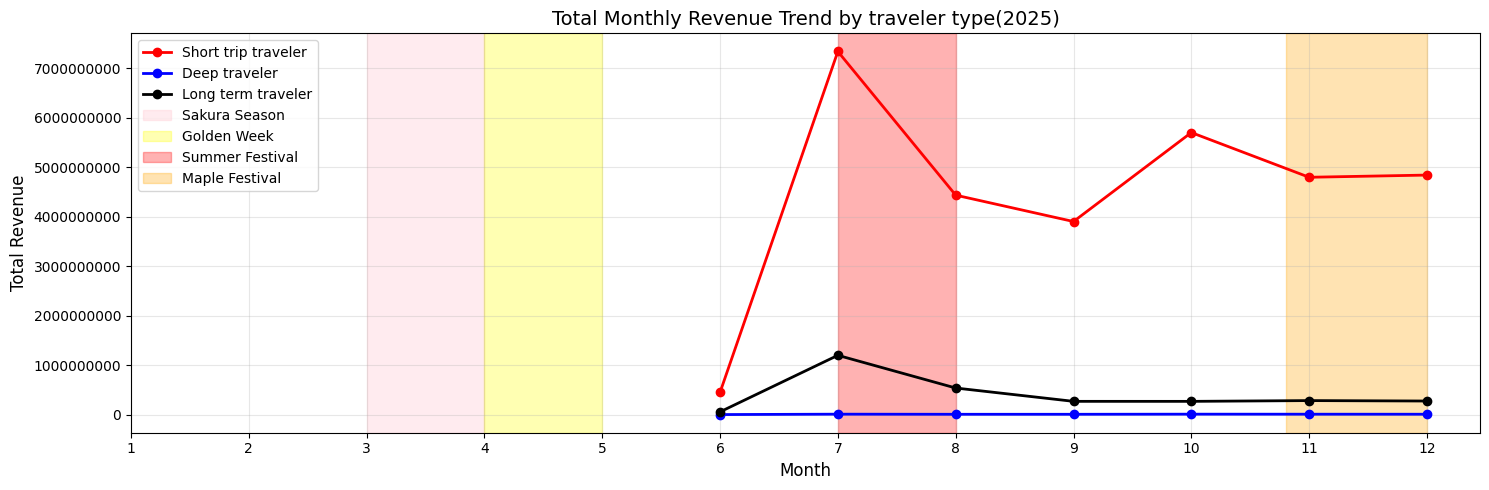

In [ ]:
booked2=df_combined[df_combined['available']==0]
booked2['date']=pd.to_datetime(booked2['date'])
booked2['month']=booked2['date'].dt.month
booked2['year']=booked2['date'].dt.year
booked20252=booked2[booked2['year']==2025]
booked20262=booked2[booked2['year']==2026]
t120252=booked20252[booked20252['minimum_nights_x']<=7]
t220252=booked20252[(booked20252['minimum_nights_x']>7)&(booked20252['minimum_nights_x']<=14)]
t320252=booked20252[(booked20252['minimum_nights_x']>=30)]
t1_monthly_revenue20252=t120252.groupby('month')['price_x'].sum().reset_index()
t2_monthly_revenue20252=t220252.groupby('month')['price_x'].sum().reset_index()
t3_monthly_revenue20252=t320252.groupby('month')['price_x'].sum().reset_index()

plt.figure(figsize=(15,5))
plt.plot(t1_monthly_revenue20252['month'],t1_monthly_revenue20252['price_x'],marker='o',linewidth=2,color='red',label="Short trip traveler")
plt.plot(t2_monthly_revenue20252['month'],t2_monthly_revenue20252['price_x'],marker='o',linewidth=2,color='blue',label="Deep traveler")
plt.plot(t3_monthly_revenue20252['month'],t3_monthly_revenue20252['price_x'],marker='o',linewidth=2,color='black',label="Long term traveler")

plt.title('Total Monthly Revenue Trend by traveler type(2025)',fontsize=14)
plt.xlabel('Month',fontsize=12)
plt.ylabel('Total Revenue',fontsize=12)
plt.grid(alpha=0.3)

plt.axvspan(3,4,color='pink',alpha=0.3,label='Sakura Season')
plt.axvspan(4,5,color='yellow',alpha=0.3,label='Golden Week')
plt.axvspan(7,8,color='red',alpha=0.3,label='Summer Festival')
plt.axvspan(10.8,12,color='orange',alpha=0.3,label='Maple Festival')

plt.ticklabel_format(style='plain')
plt.xticks(range(1,13))
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
print(f'STT: {t120252.groupby('month')['price_x'].sum()}')
print(f'DT: {t220252.groupby('month')['price_x'].sum().reset_index()}')
print(f'LTT: {t320252.groupby('month')['price_x'].sum().reset_index()}')

STT: month
6     447736376.00
7    7335227228.00
8    4432971681.00
9    3900110893.00
10   5697634085.00
11   4794219033.00
12   4838593808.00
Name: price_x, dtype: float64
DT:    month    price_x
0      6  421468.00
1      7 8291325.00
2      8 6035284.00
3      9 6127732.00
4     10 8386619.00
5     11 7766693.00
6     12 7134407.00
LTT:    month       price_x
0      6   55023079.00
1      7 1197300268.00
2      8  536865970.00
3      9  267492768.00
4     10  267249668.00
5     11  282811392.00
6     12  274041787.00


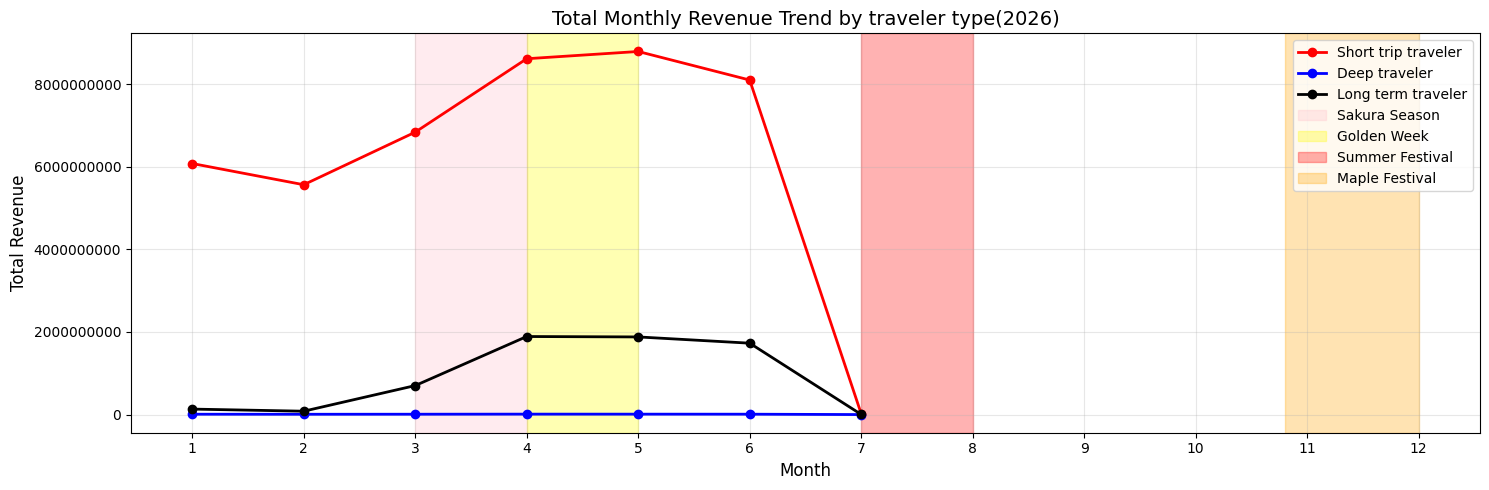

In [ ]:
booked20262=booked2[booked2['year']==2026]
t120262=booked20262[booked20262['minimum_nights_x']<=7]
t220262=booked20262[(booked20262['minimum_nights_x']>7)&(booked20262['minimum_nights_x']<=14)]
t320262=booked20262[(booked20262['minimum_nights_x']>=30)]
t1_monthly_revenue20262=t120262.groupby('month')['price_x'].sum().reset_index()
t2_monthly_revenue20262=t220262.groupby('month')['price_x'].sum().reset_index()
t3_monthly_revenue20262=t320262.groupby('month')['price_x'].sum().reset_index()

plt.figure(figsize=(15,5))
plt.plot(t1_monthly_revenue20262['month'],t1_monthly_revenue20262['price_x'],marker='o',linewidth=2,color='red',label="Short trip traveler")
plt.plot(t2_monthly_revenue20262['month'],t2_monthly_revenue20262['price_x'],marker='o',linewidth=2,color='blue',label="Deep traveler")
plt.plot(t3_monthly_revenue20262['month'],t3_monthly_revenue20262['price_x'],marker='o',linewidth=2,color='black',label="Long term traveler")

plt.title('Total Monthly Revenue Trend by traveler type(2026)',fontsize=14)
plt.xlabel('Month',fontsize=12)
plt.ylabel('Total Revenue',fontsize=12)
plt.grid(alpha=0.3)

plt.axvspan(3,4,color='pink',alpha=0.3,label='Sakura Season')
plt.axvspan(4,5,color='yellow',alpha=0.3,label='Golden Week')
plt.axvspan(7,8,color='red',alpha=0.3,label='Summer Festival')
plt.axvspan(10.8,12,color='orange',alpha=0.3,label='Maple Festival')

plt.ticklabel_format(style='plain')
plt.xticks(range(1,13))
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
print(f'STT: {t120262.groupby('month')['price_x'].sum().reset_index()}')
print(f'DT: {t220262.groupby('month')['price_x'].sum().reset_index()}')
print(f'LTT: {t320262.groupby('month')['price_x'].sum().reset_index()}')

STT:    month       price_x
0      1 6077498893.00
1      2 5564190268.00
2      3 6836796670.00
3      4 8614325149.00
4      5 8789742694.00
5      6 8098700588.00
6      7   19747060.00
DT:    month     price_x
0      1  8412904.00
1      2  7145376.00
2      3  8402992.00
3      4 10505280.00
4      5  9948024.00
5      6  8981483.00
6      7     4317.00
LTT:    month       price_x
0      1  132566102.00
1      2   81391113.00
2      3  701713390.00
3      4 1889450186.00
4      5 1879498488.00
5      6 1728232987.00
6      7    3239078.00


In [ ]:
df_merged.head(3)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,estimated_revenue_l365d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,average_score_review,total_days,booked_days,Booking_price,occupancy_rate,revenue
0,1034638294163485758,https://www.airbnb.com/rooms/1034638294163485758,20250627030533,2025-06-28,city scrape,1K/6 min.walk from Korakuen Station/202,"4 lines available, new construction, close to ...","""Korakuen is home to the Tokyo Dome, a landmar...",https://a0.muscache.com/pictures/miso/Hosting-...,507235651,https://www.airbnb.com/users/show/507235651,Sumyca,2023-03-26,"Tokyo, Japan",わたしたち「Sumyca」は、スマホ1つで住宅、宿泊共に予約が完結する短期賃貸プラットフォー...,within an hour,100.00,97.00,0,https://a0.muscache.com/im/pictures/user/User-...,https://a0.muscache.com/im/pictures/user/User-...,NaN,74.00,76.00,['phone'],1,1,"Bunkyo City, Tokyo Prefecture, Japan",Bunkyo Ku,35.71,139.75,Entire home/apt,Entire home/apt,3,1.00,1 bath,0.00,2.00,"[""Bidet"", ""Body soap"", ""Bed linens"", ""Hot wate...",100000.00,30,365,30.00,30.00,365.00,365.00,30.00,365.00,t,16,46,76,251,2025-06-28,0,0,0,173,0,0,0.00,NaT,NaT,4.72,4.76,4.71,4.79,4.83,4.71,4.67,M130033302,1,74,74,0,0,0.00,4.74,365,114,100000.00,0.31,11400000.00
1,1034640917459370080,https://www.airbnb.com/rooms/1034640917459370080,20250627030533,2025-06-28,city scrape,Near Tokyo Dome/6 min. walk from Korakuen/d01,"4 lines available, new construction, close to ...","Korakuen is home to the Tokyo Dome, a landmark...",https://a0.muscache.com/pictures/miso/Hosting-...,507235651,https://www.airbnb.com/users/show/507235651,Sumyca,2023-03-26,"Tokyo, Japan",わたしたち「Sumyca」は、スマホ1つで住宅、宿泊共に予約が完結する短期賃貸プラットフォー...,within an hour,100.00,97.00,0,https://a0.muscache.com/im/pictures/user/User-...,https://a0.muscache.com/im/pictures/user/User-...,NaN,74.00,76.00,['phone'],1,1,"Bunkyo City, Tokyo Prefecture, Japan",Bunkyo Ku,35.71,139.75,Entire home/apt,Entire home/apt,8,1.00,1 bath,2.00,5.00,"[""Bidet"", ""Body soap"", ""Bed linens"", ""Hot wate...",100000.00,30,365,30.00,30.00,365.00,365.00,30.00,365.00,t,2,27,57,237,2025-06-28,0,0,0,154,0,0,0.00,NaT,NaT,4.72,4.76,4.71,4.79,4.83,4.71,4.67,M130033307,1,74,74,0,0,0.00,4.74,365,128,100000.00,0.35,12800000.00
2,1034643225542448999,https://www.airbnb.com/rooms/1034643225542448999,20250627030533,2025-06-27,city scrape,"QY31 JR Train station 5-min walk, airport dire...","Dear friends, I really appreciate that you rea...",NaN,https://a0.muscache.com/pictures/hosting/Hosti...,279064316,https://www.airbnb.com/users/show/279064316,Na,2019-07-25,NaN,NaN,within an hour,100.00,100.00,0,https://a0.muscache.com/im/pictures/user/e5cb6...,https://a0.muscache.com/im/pictures/user/e5cb6...,Asakusa/Ueno,41.00,41.00,"['email', 'phone']",1,1,Unknown,Taito Ku,35.70,139.78,Entire home/ap

In [ ]:
df_merged[df_merged['minimum_nights']<=7]['neighbourhood_cleansed'].value_counts()

neighbourhood_cleansed
Shinjuku Ku            4006
Sumida Ku              2976
Taito Ku               2564
Toshima Ku             2146
Shibuya Ku             1403
Ota Ku                 1011
Minato Ku               833
Katsushika Ku           750
Nakano Ku               712
Kita Ku                 696
Setagaya Ku             659
Suginami Ku             500
Edogawa Ku              466
Koto Ku                 438
Itabashi Ku             394
Bunkyo Ku               381
Shinagawa Ku            353
Adachi Ku               331
Chuo Ku                 321
Chiyoda Ku              252
Arakawa Ku              226
Meguro Ku               122
Nerima Ku               106
Musashino Shi            49
Hachioji Shi             45
Ome Shi                  33
Machida Shi              33
Mitaka Shi               31
Chofu Shi                29
Akiruno Shi              27
Hino Shi                 23
Kokubunji Shi            22
Fuchu Shi                18
Nishitokyo Shi           13
Komae Shi                

# Empty rate 

## Empty rate between different district

In [ ]:
df_merged['empty_rate']=1-(df_merged['occupancy_rate'])
df_merged.head(3)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,estimated_revenue_l365d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,average_score_review,total_days,booked_days,Booking_price,occupancy_rate,revenue,empty_rate
0,1034638294163485758,https://www.airbnb.com/rooms/1034638294163485758,20250627030533,2025-06-28,city scrape,1K/6 min.walk from Korakuen Station/202,"4 lines available, new construction, close to ...","""Korakuen is home to the Tokyo Dome, a landmar...",https://a0.muscache.com/pictures/miso/Hosting-...,507235651,https://www.airbnb.com/users/show/507235651,Sumyca,2023-03-26,"Tokyo, Japan",わたしたち「Sumyca」は、スマホ1つで住宅、宿泊共に予約が完結する短期賃貸プラットフォー...,within an hour,100.00,97.00,0,https://a0.muscache.com/im/pictures/user/User-...,https://a0.muscache.com/im/pictures/user/User-...,NaN,74.00,76.00,['phone'],1,1,"Bunkyo City, Tokyo Prefecture, Japan",Bunkyo Ku,35.71,139.75,Entire home/apt,Entire home/apt,3,1.00,1 bath,0.00,2.00,"[""Bidet"", ""Body soap"", ""Bed linens"", ""Hot wate...",100000.00,30,365,30.00,30.00,365.00,365.00,30.00,365.00,t,16,46,76,251,2025-06-28,0,0,0,173,0,0,0.00,NaT,NaT,4.72,4.76,4.71,4.79,4.83,4.71,4.67,M130033302,1,74,74,0,0,0.00,4.74,365,114,100000.00,0.31,11400000.00,0.69
1,1034640917459370080,https://www.airbnb.com/rooms/1034640917459370080,20250627030533,2025-06-28,city scrape,Near Tokyo Dome/6 min. walk from Korakuen/d01,"4 lines available, new construction, close to ...","Korakuen is home to the Tokyo Dome, a landmark...",https://a0.muscache.com/pictures/miso/Hosting-...,507235651,https://www.airbnb.com/users/show/507235651,Sumyca,2023-03-26,"Tokyo, Japan",わたしたち「Sumyca」は、スマホ1つで住宅、宿泊共に予約が完結する短期賃貸プラットフォー...,within an hour,100.00,97.00,0,https://a0.muscache.com/im/pictures/user/User-...,https://a0.muscache.com/im/pictures/user/User-...,NaN,74.00,76.00,['phone'],1,1,"Bunkyo City, Tokyo Prefecture, Japan",Bunkyo Ku,35.71,139.75,Entire home/apt,Entire home/apt,8,1.00,1 bath,2.00,5.00,"[""Bidet"", ""Body soap"", ""Bed linens"", ""Hot wate...",100000.00,30,365,30.00,30.00,365.00,365.00,30.00,365.00,t,2,27,57,237,2025-06-28,0,0,0,154,0,0,0.00,NaT,NaT,4.72,4.76,4.71,4.79,4.83,4.71,4.67,M130033307,1,74,74,0,0,0.00,4.74,365,128,100000.00,0.35,12800000.00,0.65
2,1034643225542448999,https://www.airbnb.com/rooms/1034643225542448999,20250627030533,2025-06-27,city scrape,"QY31 JR Train station 5-min walk, airport dire...","Dear friends, I really appreciate that you rea...",NaN,https://a0.muscache.com/pictures/hosting/Hosti...,279064316,https://www.airbnb.com/users/show/279064316,Na,2019-07-25,NaN,NaN,within an hour,100.00,100.00,0,https://a0.muscache.com/im/pictures/user/e5cb6...,https://a0.muscache.com/im/pictures/user/e5cb6...,Asakusa/Ueno,41.00,41.00,"['email', 'phone']",1,1,Unknown,Taito Ku,35.70,

In [ ]:
df_merged.groupby('neighbourhood_cleansed')['empty_rate'].mean().sort_values(ascending=False)

neighbourhood_cleansed
Kiyose Shi            0.71
Fussa Shi             0.70
Ome Shi               0.68
Hamura Shi            0.68
Hino Shi              0.63
Nerima Ku             0.61
Machida Shi           0.60
Ota Ku                0.58
Kokubunji Shi         0.57
Edogawa Ku            0.57
Higashimurayama Shi   0.56
Mitaka Shi            0.56
Koto Ku               0.55
Hachioji Shi          0.54
Setagaya Ku           0.54
Itabashi Ku           0.54
Katsushika Ku         0.54
Kita Ku               0.53
Chofu Shi             0.53
Sumida Ku             0.52
Adachi Ku             0.52
Bunkyo Ku             0.52
Toshima Ku            0.51
Meguro Ku             0.51
Suginami Ku           0.51
Akishima Shi          0.50
Taito Ku              0.50
Chiyoda Ku            0.50
Fuchu Shi             0.49
Shinagawa Ku          0.48
Hinohara Mura         0.48
Nakano Ku             0.48
Komae Shi             0.48
Minato Ku             0.48
Shibuya Ku            0.47
Kunitachi Shi         0.47
Shinj

In [ ]:
df_merged[df_merged['neighbourhood_cleansed']=='Kiyose Shi']['id'].nunique()

11

In [ ]:
df_merged[df_merged['neighbourhood_cleansed']=='Fussa Shi']['id'].nunique()

12

In [ ]:
pd.set_option('display.max_rows',None)
(df_merged[df_merged['empty_rate']>=0.5]['neighbourhood_cleansed'].value_counts())/(df_merged['id'].nunique())*100

neighbourhood_cleansed
Shinjuku Ku           8.78
Sumida Ku             7.97
Toshima Ku            5.32
Taito Ku              4.77
Shibuya Ku            3.23
Ota Ku                2.75
Setagaya Ku           2.15
Minato Ku             1.79
Katsushika Ku         1.69
Kita Ku               1.62
Nakano Ku             1.41
Edogawa Ku            1.20
Suginami Ku           1.17
Koto Ku               0.98
Bunkyo Ku             0.97
Itabashi Ku           0.95
Adachi Ku             0.95
Shinagawa Ku          0.76
Chuo Ku               0.49
Chiyoda Ku            0.47
Arakawa Ku            0.30
Meguro Ku             0.29
Nerima Ku             0.28
Hachioji Shi          0.10
Mitaka Shi            0.10
Ome Shi               0.10
Machida Shi           0.09
Musashino Shi         0.08
Kokubunji Shi         0.06
Hino Shi              0.06
Chofu Shi             0.05
Fuchu Shi             0.04
Fussa Shi             0.04
Komae Shi             0.03
Kiyose Shi            0.03
Higashimurayama Shi   0.03
Kunit

C:\Users\hangk\AppData\Local\Temp\ipykernel_30960\1379922687.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  empty['date']=pd.to_datetime(empty['date'])
C:\Users\hangk\AppData\Local\Temp\ipykernel_30960\1379922687.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  empty['month']=empty['date'].dt.month
C:\Users\hangk\AppData\Local\Temp\ipykernel_30960\1379922687.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

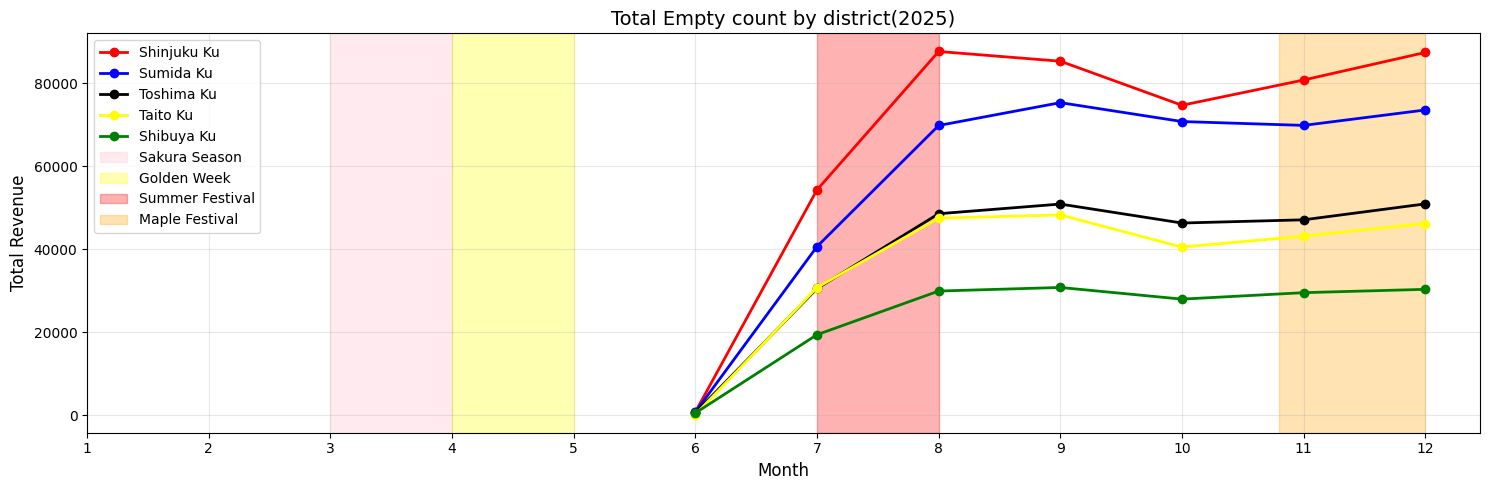

In [ ]:
empty=df_combined[df_combined['available']==1]
empty['date']=pd.to_datetime(empty['date'])
empty['month']=empty['date'].dt.month
empty['year']=empty['date'].dt.year
empty2025=empty[empty['year']==2025]
empty2026=empty[empty['year']==2026]
e12025=empty2025[empty2025['neighbourhood_cleansed']=='Shinjuku Ku']
e22025=empty2025[empty2025['neighbourhood_cleansed']=='Sumida Ku']
e32025=empty2025[empty2025['neighbourhood_cleansed']=='Toshima Ku']
e42025=empty2025[empty2025['neighbourhood_cleansed']=='Taito Ku']
e52025=empty2025[empty2025['neighbourhood_cleansed']=='Shibuya Ku']
e1_counts_2025=e12025.groupby('month')['available'].sum().reset_index()
e2_counts_2025=e22025.groupby('month')['available'].sum().reset_index()
e3_counts_2025=e32025.groupby('month')['available'].sum().reset_index()
e4_counts_2025=e42025.groupby('month')['available'].sum().reset_index()
e5_counts_2025=e52025.groupby('month')['available'].sum().reset_index()

plt.figure(figsize=(15,5))
plt.plot(e1_counts_2025['month'],e1_counts_2025['available'],marker='o',linewidth=2,color='red',label="Shinjuku Ku")
plt.plot(e2_counts_2025['month'],e2_counts_2025['available'],marker='o',linewidth=2,color='blue',label="Sumida Ku")
plt.plot(e3_counts_2025['month'],e3_counts_2025['available'],marker='o',linewidth=2,color='black',label="Toshima Ku")
plt.plot(e4_counts_2025['month'],e4_counts_2025['available'],marker='o',linewidth=2,color='yellow',label="Taito Ku")
plt.plot(e5_counts_2025['month'],e5_counts_2025['available'],marker='o',linewidth=2,color='green',label="Shibuya Ku")


plt.title('Total Empty count by district(2025)',fontsize=14)
plt.xlabel('Month',fontsize=12)
plt.ylabel('Total Revenue',fontsize=12)
plt.grid(alpha=0.3)

plt.axvspan(3,4,color='pink',alpha=0.3,label='Sakura Season')
plt.axvspan(4,5,color='yellow',alpha=0.3,label='Golden Week')
plt.axvspan(7,8,color='red',alpha=0.3,label='Summer Festival')
plt.axvspan(10.8,12,color='orange',alpha=0.3,label='Maple Festival')

plt.ticklabel_format(style='plain')
plt.xticks(range(1,13))
plt.legend()
plt.tight_layout()
plt.show()

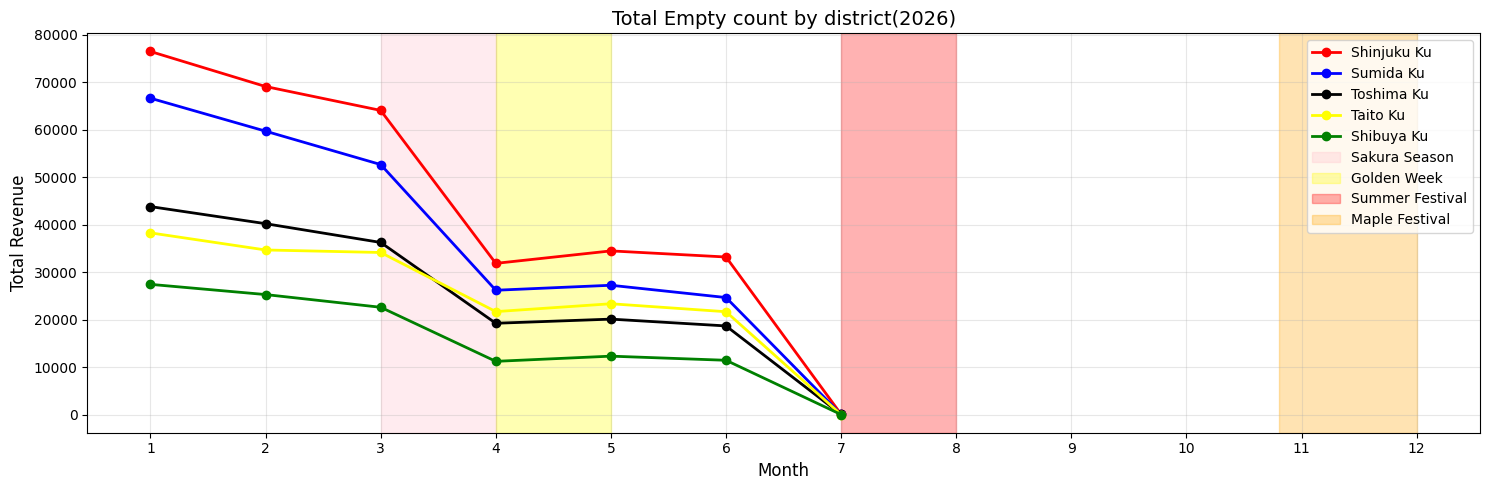

In [ ]:
e12026=empty2026[empty2026['neighbourhood_cleansed']=='Shinjuku Ku']
e22026=empty2026[empty2026['neighbourhood_cleansed']=='Sumida Ku']
e32026=empty2026[empty2026['neighbourhood_cleansed']=='Toshima Ku']
e42026=empty2026[empty2026['neighbourhood_cleansed']=='Taito Ku']
e52026=empty2026[empty2026['neighbourhood_cleansed']=='Shibuya Ku']
e1_counts_2026=e12026.groupby('month')['available'].sum().reset_index()
e2_counts_2026=e22026.groupby('month')['available'].sum().reset_index()
e3_counts_2026=e32026.groupby('month')['available'].sum().reset_index()
e4_counts_2026=e42026.groupby('month')['available'].sum().reset_index()
e5_counts_2026=e52026.groupby('month')['available'].sum().reset_index()

plt.figure(figsize=(15,5))
plt.plot(e1_counts_2026['month'],e1_counts_2026['available'],marker='o',linewidth=2,color='red',label="Shinjuku Ku")
plt.plot(e2_counts_2026['month'],e2_counts_2026['available'],marker='o',linewidth=2,color='blue',label="Sumida Ku")
plt.plot(e3_counts_2026['month'],e3_counts_2026['available'],marker='o',linewidth=2,color='black',label="Toshima Ku")
plt.plot(e4_counts_2026['month'],e4_counts_2026['available'],marker='o',linewidth=2,color='yellow',label="Taito Ku")
plt.plot(e5_counts_2026['month'],e5_counts_2026['available'],marker='o',linewidth=2,color='green',label="Shibuya Ku")


plt.title('Total Empty count by district(2026)',fontsize=14)
plt.xlabel('Month',fontsize=12)
plt.ylabel('Total Revenue',fontsize=12)
plt.grid(alpha=0.3)

plt.axvspan(3,4,color='pink',alpha=0.3,label='Sakura Season')
plt.axvspan(4,5,color='yellow',alpha=0.3,label='Golden Week')
plt.axvspan(7,8,color='red',alpha=0.3,label='Summer Festival')
plt.axvspan(10.8,12,color='orange',alpha=0.3,label='Maple Festival')

plt.ticklabel_format(style='plain')
plt.xticks(range(1,13))
plt.legend()
plt.tight_layout()
plt.show()

## Empty rate between traveler type

In [ ]:
df_merged[df_merged['minimum_nights']<=7]['empty_rate'].mean()

np.float64(0.494636064374611)

In [ ]:
df_merged[df_merged['minimum_nights']>=30]['empty_rate'].mean()

np.float64(0.585905309912241)

# Review

In [ ]:
df_merged.head(2)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,estimated_revenue_l365d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,average_score_review,total_days,booked_days,Booking_price,occupancy_rate,revenue
0,1034638294163485758,https://www.airbnb.com/rooms/1034638294163485758,20250627030533,2025-06-28,city scrape,1K/6 min.walk from Korakuen Station/202,"4 lines available, new construction, close to ...","""Korakuen is home to the Tokyo Dome, a landmar...",https://a0.muscache.com/pictures/miso/Hosting-...,507235651,https://www.airbnb.com/users/show/507235651,Sumyca,2023-03-26,"Tokyo, Japan",わたしたち「Sumyca」は、スマホ1つで住宅、宿泊共に予約が完結する短期賃貸プラットフォー...,within an hour,100.00,97.00,0,https://a0.muscache.com/im/pictures/user/User-...,https://a0.muscache.com/im/pictures/user/User-...,NaN,74.00,76.00,['phone'],1,1,"Bunkyo City, Tokyo Prefecture, Japan",Bunkyo Ku,35.71,139.75,Entire home/apt,Entire home/apt,3,1.00,1 bath,0.00,2.00,"[""Bidet"", ""Body soap"", ""Bed linens"", ""Hot wate...",100000.00,30,365,30.00,30.00,365.00,365.00,30.00,365.00,t,16,46,76,251,2025-06-28,0,0,0,173,0,0,0.00,NaT,NaT,4.72,4.76,4.71,4.79,4.83,4.71,4.67,M130033302,1,74,74,0,0,0.00,4.74,365,114,100000.00,0.31,11400000.00
1,1034640917459370080,https://www.airbnb.com/rooms/1034640917459370080,20250627030533,2025-06-28,city scrape,Near Tokyo Dome/6 min. walk from Korakuen/d01,"4 lines available, new construction, close to ...","Korakuen is home to the Tokyo Dome, a landmark...",https://a0.muscache.com/pictures/miso/Hosting-...,507235651,https://www.airbnb.com/users/show/507235651,Sumyca,2023-03-26,"Tokyo, Japan",わたしたち「Sumyca」は、スマホ1つで住宅、宿泊共に予約が完結する短期賃貸プラットフォー...,within an hour,100.00,97.00,0,https://a0.muscache.com/im/pictures/user/User-...,https://a0.muscache.com/im/pictures/user/User-...,NaN,74.00,76.00,['phone'],1,1,"Bunkyo City, Tokyo Prefecture, Japan",Bunkyo Ku,35.71,139.75,Entire home/apt,Entire home/apt,8,1.00,1 bath,2.00,5.00,"[""Bidet"", ""Body soap"", ""Bed linens"", ""Hot wate...",100000.00,30,365,30.00,30.00,365.00,365.00,30.00,365.00,t,2,27,57,237,2025-06-28,0,0,0,154,0,0,0.00,NaT,NaT,4.72,4.76,4.71,4.79,4.83,4.71,4.67,M130033307,1,74,74,0,0,0.00,4.74,365,128,100000.00,0.35,12800000.00


In [ ]:
df_merged.groupby('host_id')['revenue'].sum().sort_values(ascending=False)

host_id
584199673   2582696885.00
576573584   2404266360.00
681248305   1499866341.00
673266881   1113760520.00
686554634   1001797331.00
                 ...     
93791154             0.00
551672744            0.00
243229864            0.00
262176508            0.00
51583299             0.00
Name: revenue, Length: 5352, dtype: float64

In [ ]:
df_reviews.head(2)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1034643225542448999,1038843202296163919,2023-12-04,537054138,Gio,"Walking distance to Akihabara, many restaurant..."
1,1034643225542448999,1043840074965670496,2023-12-11,38643938,Takuji,コンパクトでちょうど良いサイズ感でした。<br/>綺麗にリノベーションされており、過ごしやす...


In [ ]:
df_merged_review=pd.merge(df_merged,df_reviews,left_on='id',right_on='listing_id',how='left')
df_merged_review.head()

,id_x,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,estimated_revenue_l365d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,average_score_review,total_days,booked_days,Booking_price,occupancy_rate,revenue,listing_id,id_y,date,reviewer_id,reviewer_name,comments
0,1034638294163485758,https://www.airbnb.com/rooms/1034638294163485758,20250627030533,2025-06-28,city scrape,1K/6 min.walk from Korakuen Station/202,"4 lines available, new construction, close to ...","""Korakuen is home to the Tokyo Dome, a landmar...",https://a0.muscache.com/pictures/miso/Hosting-...,507235651,https://www.airbnb.com/users/show/507235651,Sumyca,2023-03-26,"Tokyo, Japan",わたしたち「Sumyca」は、スマホ1つで住宅、宿泊共に予約が完結する短期賃貸プラットフォー...,within an hour,100.00,97.00,0,https://a0.muscache.com/im/pictures/user/User-...,https://a0.muscache.com/im/pictures/user/User-...,NaN,74.00,76.00,['phone'],1,1,"Bunkyo City, Tokyo Prefecture, Japan",Bunkyo Ku,35.71,139.75,Entire home/apt,Entire home/apt,3,1.00,1 bath,0.00,2.00,"[""Bidet"", ""Body soap"", ""Bed linens"", ""Hot wate...",100000.00,30,365,30.00,30.00,365.00,365.00,30.00,365.00,t,16,46,76,251,2025-06-28,0,0,0,173,0,0,0.00,NaT,NaT,4.72,4.76,4.71,4.79,4.83,4.71,4.67,M130033302,1,74,74,0,0,0.00,4.74,365,114,100000.00,0.31,11400000.00,NaN,NaN,NaN,NaN,NaN,NaN
1,1034640917459370080,https://www.airbnb.com/rooms/1034640917459370080,20250627030533,2025-06-28,city scrape,Near Tokyo Dome/6 min. walk from Korakuen/d01,"4 lines available, new construction, close to ...","Korakuen is home to the Tokyo Dome, a landmark...",https://a0.muscache.com/pictures/miso/Hosting-...,507235651,https://www.airbnb.com/users/show/507235651,Sumyca,2023-03-26,"Tokyo, Japan",わたしたち「Sumyca」は、スマホ1つで住宅、宿泊共に予約が完結する短期賃貸プラットフォー...,within an hour,100.00,97.00,0,https://a0.muscache.com/im/pictures/user/User-...,https://a0.muscache.com/im/pictures/user/User-...,NaN,74.00,76.00,['phone'],1,1,"Bunkyo City, Tokyo Prefecture, Japan",Bunkyo Ku,35.71,139.75,Entire home/apt,Entire home/apt,8,1.00,1 bath,2.00,5.00,"[""Bidet"", ""Body soap"", ""Bed linens"", ""Hot wate...",100000.00,30,365,30.00,30.00,365.00,365.00,30.00,365.00,t,2,27,57,237,2025-06-28,0,0,0,154,0,0,0.00,NaT,NaT,4.72,4.76,4.71,4.79,4.83,4.71,4.67,M130033307,1,74,74,0,0,0.00,4.74,365,128,100000.00,0.35,12800000.00,NaN,NaN,NaN,NaN,NaN,NaN
2,1034643225542448999,https://www.airbnb.com/rooms/1034643225542448999,20250627030533,2025-06-27,city scrape,"QY31 JR Train station 5-min walk, airport dire...","Dear friends, I really appreciate that you rea...",NaN,https://a0.muscache.com/pictures/hosting/Hosti...,279064316,https://www.airbnb.com/users/show/279064316,Na,2019-07-25,NaN,NaN,within an hour,100.00,100.00,0,https://a0.muscache.com/im/pictures/user/e5cb6...,https://a0.muscache.com/im/pictures/us

In [ ]:
df_merged_review.groupby('id_x')['revenue'].sum().sort_values(ascending=False)

id_x
1181748125859376165   51653937700.00
1125105431762016220   19411628376.00
14767582              12858019648.00
16279531              12618329040.00
559888044883833193     9349824279.00
                           ...      
1449040516671733753             0.00
41136313                        0.00
41136398                        0.00
1234689584781236773             0.00
1044456784916579734             0.00
Name: revenue, Length: 25297, dtype: float64

In [ ]:
df_best_comments=df_merged_review[df_merged_review['id_x']==14767582]

In [ ]:
!pip install openai
!pip install python-dotenv


[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import os
from openai import OpenAI


client = OpenAI(
    # 若没有配置环境变量，请用百炼API Key将下行替换为：api_key="sk-xxx",
    # 新加坡和北京地域的API Key不同。获取API Key：https://www.alibabacloud.com/help/zh/model-studio/get-api-key
    api_key=os.getenv("QWEN_API_KEY"),
    # 以下为新加坡地域base_url，若使用北京地域的模型，需将base_url替换为：https://dashscope.aliyuncs.com/compatible-mode/v1
    base_url="https://dashscope-intl.aliyuncs.com/compatible-mode/v1",
)

def call_qwen(client,system_prompt,user_prompt):
    completion = client.chat.completions.create(
        # 此处以qwen-plus为例，可按需更换模型名称。模型列表：https://www.alibabacloud.com/help/zh/model-studio/getting-started/models
        model="qwen-plus",
        messages=[
            {"role": "system", "content":system_prompt},
            {"role": "user", "content":user_prompt},
        ],

        # Qwen3模型通过enable_thinking参数控制思考过程（开源版默认True，商业版默认False）
        # 使用Qwen3开源版模型时，若未启用流式输出，请将下行取消注释，否则会报错
        # extra_body={"enable_thinking": False},
    )
    return completion

# print(completion.model_dump_json())
# system_prompt="You are a helpful assistant."
# user_prompt= "今日天氣如何"
# completion=call_qwen(client,system_prompt,user_prompt)
# print(completion.model_dump()['choices'][0]['message']['content'])

In [ ]:
df_merged_review.head(3)

,id_x,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,estimated_revenue_l365d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,average_score_review,total_days,booked_days,Booking_price,occupancy_rate,revenue,listing_id,id_y,date,reviewer_id,reviewer_name,comments
0,1034638294163485758,https://www.airbnb.com/rooms/1034638294163485758,20250627030533,2025-06-28,city scrape,1K/6 min.walk from Korakuen Station/202,"4 lines available, new construction, close to ...","""Korakuen is home to the Tokyo Dome, a landmar...",https://a0.muscache.com/pictures/miso/Hosting-...,507235651,https://www.airbnb.com/users/show/507235651,Sumyca,2023-03-26,"Tokyo, Japan",わたしたち「Sumyca」は、スマホ1つで住宅、宿泊共に予約が完結する短期賃貸プラットフォー...,within an hour,100.00,97.00,0,https://a0.muscache.com/im/pictures/user/User-...,https://a0.muscache.com/im/pictures/user/User-...,NaN,74.00,76.00,['phone'],1,1,"Bunkyo City, Tokyo Prefecture, Japan",Bunkyo Ku,35.71,139.75,Entire home/apt,Entire home/apt,3,1.00,1 bath,0.00,2.00,"[""Bidet"", ""Body soap"", ""Bed linens"", ""Hot wate...",100000.00,30,365,30.00,30.00,365.00,365.00,30.00,365.00,t,16,46,76,251,2025-06-28,0,0,0,173,0,0,0.00,NaT,NaT,4.72,4.76,4.71,4.79,4.83,4.71,4.67,M130033302,1,74,74,0,0,0.00,4.74,365,114,100000.00,0.31,11400000.00,NaN,NaN,NaN,NaN,NaN,NaN
1,1034640917459370080,https://www.airbnb.com/rooms/1034640917459370080,20250627030533,2025-06-28,city scrape,Near Tokyo Dome/6 min. walk from Korakuen/d01,"4 lines available, new construction, close to ...","Korakuen is home to the Tokyo Dome, a landmark...",https://a0.muscache.com/pictures/miso/Hosting-...,507235651,https://www.airbnb.com/users/show/507235651,Sumyca,2023-03-26,"Tokyo, Japan",わたしたち「Sumyca」は、スマホ1つで住宅、宿泊共に予約が完結する短期賃貸プラットフォー...,within an hour,100.00,97.00,0,https://a0.muscache.com/im/pictures/user/User-...,https://a0.muscache.com/im/pictures/user/User-...,NaN,74.00,76.00,['phone'],1,1,"Bunkyo City, Tokyo Prefecture, Japan",Bunkyo Ku,35.71,139.75,Entire home/apt,Entire home/apt,8,1.00,1 bath,2.00,5.00,"[""Bidet"", ""Body soap"", ""Bed linens"", ""Hot wate...",100000.00,30,365,30.00,30.00,365.00,365.00,30.00,365.00,t,2,27,57,237,2025-06-28,0,0,0,154,0,0,0.00,NaT,NaT,4.72,4.76,4.71,4.79,4.83,4.71,4.67,M130033307,1,74,74,0,0,0.00,4.74,365,128,100000.00,0.35,12800000.00,NaN,NaN,NaN,NaN,NaN,NaN
2,1034643225542448999,https://www.airbnb.com/rooms/1034643225542448999,20250627030533,2025-06-27,city scrape,"QY31 JR Train station 5-min walk, airport dire...","Dear friends, I really appreciate that you rea...",NaN,https://a0.muscache.com/pictures/hosting/Hosti...,279064316,https://www.airbnb.com/users/show/279064316,Na,2019-07-25,NaN,NaN,within an hour,100.00,100.00,0,https://a0.muscache.com/im/pictures/user/e5cb6...,https://a0.muscache.com/im/pictures/us

In [ ]:
df_best_comments=df_merged_review[df_merged_review['neighbourhood_cleansed']=='Minato Ku']

In [ ]:
# import pandas as pd

# all_transcripts=df_best_comments['reviewer_name'].tolist()
# all_transcripts

# system_prompt='''
# You are a helper assistant.You are given a transcript of a one-stop travel service provider.
# Your task is to identify the nationality of reviewer through their name and return it in a structured json format.

# *Total nationality distribution - e.g. Japanese 10% , Chinese 20%
# '''

# user_prompt=f"Here is the transcript,with each call being presented as a member of a python list:{all_transcripts}."
# completion=call_qwen(client,system_prompt,user_prompt)

# print(completion.model_dump_json())

{"id":"chatcmpl-1a19c08e-c402-9f4d-92ed-e82f88089bea","choices":[{"finish_reason":"stop","index":0,"logprobs":null,"message":{"content":"{\n  \"total_nationality_distribution\": [\n    {\n      \"nationality\": \"Japanese\",\n      \"percentage\": 20\n    },\n    {\n      \"nationality\": \"Chinese\",\n      \"percentage\": 15\n    },\n    {\n      \"nationality\": \"Korean\",\n      \"percentage\": 18\n    },\n    {\n      \"nationality\": \"American\",\n      \"percentage\": 10\n    },\n    {\n      \"nationality\": \"French\",\n      \"percentage\": 5\n    },\n    {\n      \"nationality\": \"German\",\n      \"percentage\": 4\n    },\n    {\n      \"nationality\": \"British\",\n      \"percentage\": 3\n    },\n    {\n      \"nationality\": \"Canadian\",\n      \"percentage\": 3\n    },\n    {\n      \"nationality\": \"Australian\",\n      \"percentage\": 2\n    },\n    {\n      \"nationality\": \"Indian\",\n      \"percentage\": 2\n    },\n    {\n      \"nationality\": \"Thai\",\n  

In [ ]:
# completion.model_dump()

{'id': 'chatcmpl-1a19c08e-c402-9f4d-92ed-e82f88089bea',
 'choices': [{'finish_reason': 'stop',
   'index': 0,
   'logprobs': None,
   'message': {'content': '{\n  "total_nationality_distribution": [\n    {\n      "nationality": "Japanese",\n      "percentage": 20\n    },\n    {\n      "nationality": "Chinese",\n      "percentage": 15\n    },\n    {\n      "nationality": "Korean",\n      "percentage": 18\n    },\n    {\n      "nationality": "American",\n      "percentage": 10\n    },\n    {\n      "nationality": "French",\n      "percentage": 5\n    },\n    {\n      "nationality": "German",\n      "percentage": 4\n    },\n    {\n      "nationality": "British",\n      "percentage": 3\n    },\n    {\n      "nationality": "Canadian",\n      "percentage": 3\n    },\n    {\n      "nationality": "Australian",\n      "percentage": 2\n    },\n    {\n      "nationality": "Indian",\n      "percentage": 2\n    },\n    {\n      "nationality": "Thai",\n      "percentage": 1\n    },\n    {\n      "na

In [ ]:
df_reviews.head(3)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1034643225542448999,1038843202296163919,2023-12-04,537054138,Gio,"Walking distance to Akihabara, many restaurant..."
1,1034643225542448999,1043840074965670496,2023-12-11,38643938,Takuji,コンパクトでちょうど良いサイズ感でした。<br/>綺麗にリノベーションされており、過ごしやす...
2,1034643225542448999,1088074836356243885,2024-02-10,103064428,Dante,Good location just 6 min walk from Asakusabash...


In [ ]:
df_shibuya_nationality=df_merged_review[df_merged_review['neighbourhood_cleansed']=='Shibuya Ku']
df_shibuya_nationality_dd=df_shibuya_nationality.drop_duplicates(subset=['reviewer_name'])

In [ ]:
df_shibuya_nationality_dd['reviewer_name'].count()

np.int64(24733)

In [ ]:
# import pandas as pd

# all_transcripts=df_shibuya_nationality_dd['reviewer_name'].tolist()
# all_transcripts

# system_prompt='''
# You are a helper assistant.You are given a transcript of a one-stop travel service provider.
# Your task is to identify the nationality of reviewer through their name and return it in a structured json format.

# *Total nationality distribution - e.g. Japanese 10% , Chinese 20%
# '''

# user_prompt=f"Here is the transcript,with each call being presented as a member of a python list:{all_transcripts}."
# completion=call_qwen(client,system_prompt,user_prompt)

# completion.model_dump_json()

'{"id":"chatcmpl-88d3d942-609f-9c8d-bca3-d1afd5c9d88c","choices":[{"finish_reason":"stop","index":0,"logprobs":null,"message":{"content":"{\\n  \\"nationality_distribution\\": [\\n    {\\n      \\"nationality\\": \\"Japanese\\",\\n      \\"percentage\\": 20\\n    },\\n    {\\n      \\"nationality\\": \\"Korean\\",\\n      \\"percentage\\": 15\\n    },\\n    {\\n      \\"nationality\\": \\"Chinese\\",\\n      \\"percentage\\": 15\\n    },\\n    {\\n      \\"nationality\\": \\"American\\",\\n      \\"percentage\\": 10\\n    },\\n    {\\n      \\"nationality\\": \\"Thai\\",\\n      \\"percentage\\": 8\\n    },\\n    {\\n      \\"nationality\\": \\"Vietnamese\\",\\n      \\"percentage\\": 7\\n    },\\n    {\\n      \\"nationality\\": \\"Indian\\",\\n      \\"percentage\\": 6\\n    },\\n    {\\n      \\"nationality\\": \\"Taiwanese\\",\\n      \\"percentage\\": 5\\n    },\\n    {\\n      \\"nationality\\": \\"French\\",\\n      \\"percentage\\": 4\\n    }\\n  ]\\n}","refusal":null,"role":"a

In [ ]:
# completion.model_dump()

{'id': 'chatcmpl-88d3d942-609f-9c8d-bca3-d1afd5c9d88c',
 'choices': [{'finish_reason': 'stop',
   'index': 0,
   'logprobs': None,
   'message': {'content': '{\n  "nationality_distribution": [\n    {\n      "nationality": "Japanese",\n      "percentage": 20\n    },\n    {\n      "nationality": "Korean",\n      "percentage": 15\n    },\n    {\n      "nationality": "Chinese",\n      "percentage": 15\n    },\n    {\n      "nationality": "American",\n      "percentage": 10\n    },\n    {\n      "nationality": "Thai",\n      "percentage": 8\n    },\n    {\n      "nationality": "Vietnamese",\n      "percentage": 7\n    },\n    {\n      "nationality": "Indian",\n      "percentage": 6\n    },\n    {\n      "nationality": "Taiwanese",\n      "percentage": 5\n    },\n    {\n      "nationality": "French",\n      "percentage": 4\n    }\n  ]\n}',
    'refusal': None,
    'role': 'assistant',
    'annotations': None,
    'audio': None,
    'function_call': None,
    'tool_calls': None}}],
 'created'